O projeto começa carregando diversas bibliotecas essenciais para a ciência de dados em Python
:
• Manipulação e Computação: pandas (para DataFrames, que é a principal abstração para trabalhar com conjuntos de dados
), numpy (para computação científica e arrays multidimensionais), io, re, ast, e time
.
• Visualização: matplotlib.pyplot e seaborn (bibliotecas populares para visualização de dados
), juntamente com plotly.express, plotly.graph_objects e ipywidgets (usadas para criar dashboards e visualizações interativas
).
• Estatística e Machine Learning (sklearn): scipy.stats (para estatística e testes como ANOVA
), e módulos do scikit-learn (sklearn) para tarefas avançadas

    ◦ LinearRegression: Regressão linear

    ◦ StandardScaler: Padronização de dados

    ◦ KMeans: Algoritmo de clusterização (aprendizado não supervisionado)

    ◦ PCA: Análise de Componentes Principais (PCA) para redução de dimensionalidade

• Séries Temporais: statsmodels.tsa.seasonal.seasonal_decompose (para decomposição de séries temporais)
.
• Configurações Visuais: sns.set(style="whitegrid") é definida para um estilo visual limpo

In [ ]:
# ==============================================================================
# @title A - Imports e configurações gerais
# ==============================================================================

import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import pandas as pd
import io
import ast
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose




# Configs visuais
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100


# **Extração de dados**
A coleta de dados é o processo sistemático de reunir informações sobre as variáveis de interesse. Dados de diferentes tipos, como dados de pesquisa de satisfação, são frequentemente coletados propositalmente por especialistas para responder a problemas predefinidos

Esta seção, crucial por consumir a maior parte do tempo em projetos de análise
, foca em:
1. Coleta de Dados (Web Scraping): Os dados são coletados sistematicamente (como população feminina, óbitos por neoplasias, exames citopatológicos e diagnósticos de câncer) principalmente do DATASUS (SIM/SISCAN), utilizando o método de web scraping
. O pandas.read_html() e expressões regulares (re) são usados para ler e extrair tabelas de páginas HTML.

In [ ]:
# @title População residente por Ano segundo Unidade da Federação
# Sexo: Feminino
# Período: 2013-2025

# 1. URL e Payload (Configuração da Requisição)
url = "http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/popsvs2024br.def"

payload_string = "Linha=Unidade_da_Federa%E7%E3o&Coluna=Ano&Incremento=Popula%E7%E3o_residente&Arquivos=pop24.dbf&Arquivos=pop23.dbf&Arquivos=pop22.dbf&Arquivos=pop21.dbf&Arquivos=pop20.dbf&Arquivos=pop19.dbf&Arquivos=pop18.dbf&Arquivos=pop17.dbf&Arquivos=pop16.dbf&Arquivos=pop15.dbf&Arquivos=pop14.dbf&Arquivos=pop13.dbf&SRegi%E3o=TODAS_AS_CATEGORIAS__&pesqmes2=Digite+o+texto+e+ache+f%E1cil&SUnidade_da_Federa%E7%E3o=TODAS_AS_CATEGORIAS__&pesqmes3=Digite+o+texto+e+ache+f%E1cil&SMunic%EDpio=TODAS_AS_CATEGORIAS__&pesqmes4=Digite+o+texto+e+ache+f%E1cil&SCapital=TODAS_AS_CATEGORIAS__&pesqmes5=Digite+o+texto+e+ache+f%E1cil&SRegi%E3o_de_Sa%FAde_%28CIR%29=TODAS_AS_CATEGORIAS__&pesqmes6=Digite+o+texto+e+ache+f%E1cil&SMacrorregi%E3o_de_Sa%FAde=TODAS_AS_CATEGORIAS__&pesqmes7=Digite+o+texto+e+ache+f%E1cil&SMicrorregi%E3o_IBGE=TODAS_AS_CATEGORIAS__&pesqmes8=Digite+o+texto+e+ache+f%E1cil&SRegi%E3o_Metropolitana_-_RIDE=TODAS_AS_CATEGORIAS__&pesqmes9=Digite+o+texto+e+ache+f%E1cil&SMacrorregi%E3o_PNDR=TODAS_AS_CATEGORIAS__&SAmaz%F4nia_Legal=TODAS_AS_CATEGORIAS__&SSemi%E1rido=TODAS_AS_CATEGORIAS__&SFaixa_de_Fronteira=TODAS_AS_CATEGORIAS__&SZona_de_Fronteira=TODAS_AS_CATEGORIAS__&SMunic%EDpio_de_extrema_pobreza=TODAS_AS_CATEGORIAS__&SSexo=2&pesqmes16=Digite+o+texto+e+ache+f%E1cil&SFaixa_Et%E1ria_1=3&SFaixa_Et%E1ria_1=4&SFaixa_Et%E1ria_1=5&SFaixa_Et%E1ria_1=6&SFaixa_Et%E1ria_1=7&SFaixa_Et%E1ria_1=8&SFaixa_Et%E1ria_1=9&SFaixa_Et%E1ria_1=10&SFaixa_Et%E1ria_1=11&pesqmes17=Digite+o+texto+e+ache+f%E1cil&SFaixa_Et%E1ria_2=TODAS_AS_CATEGORIAS__&pesqmes18=Digite+o+texto+e+ache+f%E1cil&SIdade_simples=TODAS_AS_CATEGORIAS__&formato=table&mostre=Mostra"

headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
    'Referer': 'http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/popsvs2024br.def'
}

print("Fazendo requisição POST para o DATASUS (SIM)...")

try:
    response = requests.post(url, data=payload_string, headers=headers)
    response.raise_for_status()
    response.encoding = 'ISO-8859-1'

    print("Requisição bem-sucedida! Processando tabela...")

    lista_de_tabelas = pd.read_html(io.StringIO(response.text))
    df_populacao_feminina = lista_de_tabelas[0]

    if isinstance(df_populacao_feminina.columns, pd.MultiIndex):
        df_populacao_feminina.columns = df_populacao_feminina.columns.droplevel(0)

    # 2. Renomeia a primeira coluna para garantir consistência
    df_populacao_feminina = df_populacao_feminina.rename(columns={df_populacao_feminina.columns[0]: 'Unidade da Federação'})

    # 3. Remove colunas "sujas" (Unnamed, NaN) e a coluna "Total"
    colunas_para_manter = [
        col for col in df_populacao_feminina.columns
        if col == 'Unidade da Federação' or (str(col).isdigit())
    ]
    df_populacao_feminina = df_populacao_feminina[colunas_para_manter]

    # 4. Remove a linha de "TOTAL" (geralmente a primeira linha de dados)
    if str(df_populacao_feminina.iloc[0, 0]).upper() == 'TOTAL':
        df_populacao_feminina = df_populacao_feminina.iloc[1:].reset_index(drop=True)

    # 5. Separa ID e Nome da UF (Bonus: igual fizemos na anterior)
    split_data = df_populacao_feminina['Unidade da Federação'].str.split(' ', n=1, expand=True)
    df_populacao_feminina['id_uf'] = split_data[0]
    df_populacao_feminina['uf_nome'] = split_data[1]

    # 6. Reorganiza as colunas: id_uf, uf_nome, 2013, 2014...
    df_populacao_feminina = df_populacao_feminina.drop(columns=['Unidade da Federação'])

    colunas_ordenadas = ['id_uf', 'uf_nome'] + [col for col in df_populacao_feminina.columns if col not in ['id_uf', 'uf_nome']]
    df_populacao_feminina = df_populacao_feminina[colunas_ordenadas]

    print("\n--- Tabela Final Limpa e Organizada ---")
    display(df_populacao_feminina.head(10))


except requests.exceptions.HTTPError as errh:
    print(f"Erro de HTTP: {errh}")
except Exception as err:
    print(f"Um erro ocorreu: {err}")

Fazendo requisição POST para o DATASUS (SIM)...
Requisição bem-sucedida! Processando tabela...

--- Tabela Final Limpa e Organizada ---


,id_uf,uf_nome,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11,Rondônia,671.712,681.197,689.988,697.813,704.560,710.187,716.286,722.807,728.473,733.516,738.676,744.277
1,12,Acre,314.770,321.901,328.581,334.755,340.233,344.972,349.154,352.667,355.911,359.226,362.406,365.732
2,13,Amazonas,1.470.262,1.499.213,1.527.451,1.555.428,1.582.805,1.610.226,1.639.071,1.665.171,1.686.995,1.710.328,1.736.187,1.763.252
3,14,Roraima,196.760,202.959,209.196,215.334,222.090,231.518,243.189,251.943,257.688,265.436,274.864,284.281
4,15,Pará,3.202.384,3.255.636,3.306.877,3.356.843,3.403.879,3.447.290,3.489.730,3.529.495,3.565.870,3.599.418,3.632.203,3.667.255
5,16,Amapá,285.267,291.442,297.149,302.110,306.539,310.305,314.042,317.741,321.120,324.071,327.266,331.013
6,17,Tocantins,585.762,594.528,602.911,611.465,619.228,626.306,633.546,640.746,647.435,653.653,659.957,666.717
7,21,Maranhão,2.765.285,2.798.867,2.831.052,2.864.301,2.894.007,2.920.339,2.946.265,2.970.211,2.990.838,3.008.435,3.024.157,3.041.267
8,22,Piauí,1.384.550,1.398.694,1.412.334,1.425.572,1.438.094,1.449.753,1.461.177,1.471.558,1.480.606,1.488.578,1.496.184,1.504.377
9,23,Ceará,3.807.583,3.845.704,3.881.754,3.917.399,3.950.323,3.981.331,4.013.213,4.043.998,4.070.975,4.095.890,4.121.841,4.149.983


In [ ]:
# @title Óbitos p/Ocorrênc por Ano do Óbito segundo Unidade da Federação
# Categoria CID-10: C53 Neopl malig do colo do utero, C54 Neopl malig do corpo do utero, C55 Neopl malig do utero porcao NE
# 042 Neoplasia maligna do colo do útero, . 043 Neopl malig de corpo e partes n/esp útero
# Período: 2013-2024


# 1. URL e Payload (Configuração da Requisição)
url = "http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sim/cnv/obt10uf.def"

# Seu payload original (que já busca todos os anos de uma vez)
payload_string = "Linha=Unidade_da_Federa%E7%E3o&Coluna=Ano_do_%D3bito&Incremento=%D3bitos_p%2FResid%EAnc&Arquivos=obtuf24.dbf&Arquivos=obtuf23.dbf&Arquivos=obtuf22.dbf&Arquivos=obtuf21.dbf&Arquivos=obtuf20.dbf&Arquivos=obtuf19.dbf&Arquivos=obtuf18.dbf&Arquivos=obtuf17.dbf&Arquivos=obtuf16.dbf&Arquivos=obtuf15.dbf&Arquivos=obtuf14.dbf&Arquivos=obtuf13.dbf&SRegi%E3o=TODAS_AS_CATEGORIAS__&pesqmes2=Digite+o+texto+e+ache+f%E1cil&SUnidade_da_Federa%E7%E3o=TODAS_AS_CATEGORIAS__&pesqmes3=Digite+o+texto+e+ache+f%E1cil&SCap%EDtulo_CID-10=TODAS_AS_CATEGORIAS__&pesqmes4=&pesqmes5=Digite+o+texto+e+ache+f%E1cil&SCategoria_CID-10=219&SCategoria_CID-10=220&SCategoria_CID-10=221&pesqmes6=&SCausa_-_CID-BR-10=53&SCausa_-_CID-BR-10=54&SCausa_mal_definidas=TODAS_AS_CATEGORIAS__&pesqmes8=Digite+o+texto+e+ache+f%E1cil&SFaixa_Et%E1ria=TODAS_AS_CATEGORIAS__&pesqmes9=Digite+o+texto+e+ache+f%E1cil&SFaixa_Et%E1ria_OPS=TODAS_AS_CATEGORIAS__&pesqmes10=Digite+o+texto+e+ache+f%E1cil&SFaixa_Et%E1ria_det=TODAS_AS_CATEGORIAS__&SFx.Et%E1ria_Menor_1A=TODAS_AS_CATEGORIAS__&SSexo=TODAS_AS_CATEGORIAS__&SCor%2Fra%E7a=TODAS_AS_CATEGORIAS__&SEscolaridade=TODAS_AS_CATEGORIAS__&SEstado_civil=TODAS_AS_CATEGORIAS__&SLocal_ocorr%EAncia=TODAS_AS_CATEGORIAS__&formato=table&mostre=Mostra"

headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
    'Referer': 'http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sim/cnv/obt10uf.def'
}

print("Fazendo requisição POST para o DATASUS (SIM)...")

try:
    response = requests.post(url, data=payload_string, headers=headers)
    response.raise_for_status()
    response.encoding = 'ISO-8859-1'

    print("Requisição bem-sucedida! Processando tabela...")

    lista_de_tabelas = pd.read_html(io.StringIO(response.text))
    df_obitos_neop_utero = lista_de_tabelas[0]

    if isinstance(df_obitos_neop_utero.columns, pd.MultiIndex):
        df_obitos_neop_utero.columns = df_obitos_neop_utero.columns.droplevel(0)

    # 2. Renomeia a primeira coluna para garantir consistência
    df_obitos_neop_utero = df_obitos_neop_utero.rename(columns={df_obitos_neop_utero.columns[0]: 'Unidade da Federação'})

    # 3. Remove colunas "sujas" (Unnamed, NaN) e a coluna "Total"
    colunas_para_manter = [
        col for col in df_obitos_neop_utero.columns
        if col == 'Unidade da Federação' or (str(col).isdigit())
    ]
    df_obitos_neop_utero = df_obitos_neop_utero[colunas_para_manter]

    # 4. Remove a linha de "TOTAL" (geralmente a primeira linha de dados)
    if str(df_obitos_neop_utero.iloc[0, 0]).upper() == 'TOTAL':
        df_obitos_neop_utero = df_obitos_neop_utero.iloc[1:].reset_index(drop=True)

    # 5. Separa ID e Nome da UF (Bonus: igual fizemos na anterior)
    split_data = df_obitos_neop_utero['Unidade da Federação'].str.split(' ', n=1, expand=True)
    df_obitos_neop_utero['id_uf'] = split_data[0]
    df_obitos_neop_utero['uf_nome'] = split_data[1]

    # 6. Reorganiza as colunas: id_uf, uf_nome, 2013, 2014...
    df_obitos_neop_utero = df_obitos_neop_utero.drop(columns=['Unidade da Federação'])

    colunas_ordenadas = ['id_uf', 'uf_nome'] + [col for col in df_obitos_neop_utero.columns if col not in ['id_uf', 'uf_nome']]
    df_obitos_neop_utero = df_obitos_neop_utero[colunas_ordenadas]

    print("\n--- Tabela Final Limpa e Organizada ---")
    display(df_obitos_neop_utero.head(20))



except requests.exceptions.HTTPError as errh:
    print(f"Erro de HTTP: {errh}")
except Exception as err:
    print(f"Um erro ocorreu: {err}")

Fazendo requisição POST para o DATASUS (SIM)...
Requisição bem-sucedida! Processando tabela...

--- Tabela Final Limpa e Organizada ---


,id_uf,uf_nome,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11,Rondônia,47,62,66,80,71,73,83,70,69,82,85,68
1,12,Acre,40,36,36,37,40,50,52,43,37,49,72,55
2,13,Amazonas,295,321,309,289,326,326,319,318,308,313,335,350
3,14,Roraima,23,22,25,20,26,32,45,36,50,40,29,46
4,15,Pará,362,358,415,462,445,468,471,446,431,510,496,518
5,16,Amapá,42,46,41,30,39,54,54,75,67,55,51,49
6,17,Tocantins,72,74,72,79,87,75,75,70,88,77,79,98
7,21,Maranhão,418,408,412,363,435,428,404,376,417,441,402,433
8,22,Piauí,150,151,172,156,182,143,187,158,152,206,192,214
9,23,Ceará,368,370,411,413,459,434,474,458,490,464,491,444


In [ ]:
# @title SISCAN - Cito do colo - Por pacientes - Brasil
# Pacientes distintos por Ano competencia segundo UF de residencia
# Ano competencia: 2013-2025

# Faixa etária: Entre 10 a 14 anos , Entre 15 a 19 anos , Entre 20 a 24 anos , Entre 25 a 29 anos , Entre 30 a 34 anos , Entre 35 a 39 anos , Entre 40 a 44 anos , Entre 45 a 49 anos , Entre 50 a 54 anos , Entre 55 a 59 anos , Entre 60 a 64 anos , Entre 65 a 69 anos , Entre 70 a 74 anos , Entre 75 a 79 anos , Acima de 79 anos

# --- Configurações ---

# --- Configurações Iniciais ---
url = "http://tabnet.datasus.gov.br/cgi/webtabx.exe?SISCAN/cito_colo_pacbr.def"

headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
    'Referer': 'http://tabnet.datasus.gov.br/cgi/dhdat.exe?SISCAN/cito_colo_pacbr.def',
    # 'connection': 'keep-alive', # A Session já gerencia isso automaticamente
    'cache-control': 'max-age=0'
}

payload_base = "Linha=UF+de+residencia%7CCO_UF_RESIDENCIA%7C1%7Cterritorio%5Cbr_uf.cnv&Coluna=Ano+competencia%7CCO_ANO_LIBERACAO%7C1%7CCITO%5Cano.cnv&Incremento=Pacientes+distintos%7C%3Dcount%28distinct+co_paciente%29"
payload_filtros = "&pesqmes1=Digite+o+texto+e+ache+f%E1cil&SUF+de+residencia=TODAS_AS_CATEGORIAS__&pesqmes2=Digite+o+texto+e+ache+f%E1cil&SMunic.de+residencia=TODAS_AS_CATEGORIAS__&XSexo=TODAS_AS_CATEGORIAS__&XRa%E7a%2FCor=TODAS_AS_CATEGORIAS__&pesqmes6=Digite+o+texto+e+ache+f%E1cil&XFaixa+et%E1ria=Entre+10+a+14+anos%7C010-014%7C3&XFaixa+et%E1ria=Entre+15+a+19+anos%7C015-019%7C3&XFaixa+et%E1ria=Entre+20+a+24+anos%7C020-024%7C3&XFaixa+et%E1ria=Entre+25+a+29+anos%7C025-029%7C3&XFaixa+et%E1ria=Entre+30+a+34+anos%7C030-034%7C3&XFaixa+et%E1ria=Entre+35+a+39+anos%7C035-039%7C3&XFaixa+et%E1ria=Entre+40+a+44+anos%7C040-044%7C3&XFaixa+et%E1ria=Entre+45+a+49+anos%7C045-049%7C3&XFaixa+et%E1ria=Entre+50+a+54+anos%7C050-054%7C3&XFaixa+et%E1ria=Entre+55+a+59+anos%7C055-059%7C3&XFaixa+et%E1ria=Entre+60+a+64+anos%7C060-064%7C3&XFaixa+et%E1ria=Entre+65+a+69+anos%7C065-069%7C3&XFaixa+et%E1ria=Entre+70+a+74+anos%7C070-074%7C3&XFaixa+et%E1ria=Entre+75+a+79+anos%7C075-079%7C3&XFaixa+et%E1ria=Acima+de+79+anos%7C080-120%7C3&XEscolaridade=TODAS_AS_CATEGORIAS__&XCitologia+anterior=TODAS_AS_CATEGORIAS__&XAdequabilidade=TODAS_AS_CATEGORIAS__&pesqmes10=Digite+o+texto+e+ache+f%E1cil&XLaudo+Citopatol%F3gico=TODAS_AS_CATEGORIAS__&XPres.+Cel.+Endometri=TODAS_AS_CATEGORIAS__&XRepresent.+ZT=TODAS_AS_CATEGORIAS__&XMotivo+do+exame=TODAS_AS_CATEGORIAS__&XInspe%E7%E3o+do+colo=TODAS_AS_CATEGORIAS__&pesqmes15=Digite+o+texto+e+ache+f%E1cil&XAno+Resultado=TODAS_AS_CATEGORIAS__&nomedef=SISCAN%2Fcito_colo_pacbr.def&grafico="

# --- CONFIGURAÇÃO DA SESSÃO E RETRY (IMPORTANTE) ---
session = requests.Session()

# Configura estratégia de reconexão
retries = Retry(
    total=5,                # Tenta 5 vezes no total
    backoff_factor=2,       # Espera 2s, 4s, 8s entre tentativas
    status_forcelist=[500, 502, 503, 504], # Tenta de novo se o servidor der erro interno
    allowed_methods=["POST"] # Permite retry em POST (necessário para o TabNet)
)

session.mount('http://', HTTPAdapter(max_retries=retries))
session.headers.update(headers) # Aplica headers na sessão

lista_dataframes = []

print("🚀 Iniciando extração LIMPA (sem colunas extras)...")

for ano in range(2013, 2026):
    print(f"Baixando {ano}...", end=" ")

    parte_ano = f"&PAno+competencia={ano}%7C{ano}%7C4"
    payload_completo = payload_base + parte_ano + payload_filtros

    try:
        # AQUI MUDAMOS: usamos session.post e aumentamos o timeout para 180s
        response = session.post(url, data=payload_completo, timeout=180)

        # O Retry não pega timeout de leitura automaticamente, então checamos o status
        response.raise_for_status()

        html_content = response.text

        match_dados = re.search(r"data\.addRows\(\[(.*?)\]\);", html_content, re.DOTALL)
        colunas_encontradas = re.findall(r"data\.addColumn\('.*?',\s*'(.*?)'\);", html_content)

        if match_dados and colunas_encontradas:
            dados_js = match_dados.group(1)
            dados_limpos = re.sub(r"\{v:\s*([^,]+),.*?\}", r"\1", dados_js)
            lista_dados = ast.literal_eval(f"[{dados_limpos}]")

            df_temp = pd.DataFrame(lista_dados, columns=colunas_encontradas)

            if 'Total' in df_temp['UF de residencia'].values:
                df_temp = df_temp[df_temp['UF de residencia'] != 'Total']

            df_temp.set_index('UF de residencia', inplace=True)

            primeira_coluna = df_temp.columns[0]
            df_temp.rename(columns={primeira_coluna: str(ano)}, inplace=True)
            df_temp = df_temp[[str(ano)]]

            lista_dataframes.append(df_temp)
            print("✅ OK")
        else:
            print("⚠️ Padrão não encontrado (Página pode ter vindo vazia ou com erro)")

    except requests.exceptions.ReadTimeout:
        print(f"❌ Erro: Timeout (O servidor demorou demais para responder 2022+)")
    except Exception as e:
        print(f"❌ Erro: {e}")

    # Pausa leve para não sobrecarregar o servidor, mesmo com keep-alive
    time.sleep(2)

# --- CONSOLIDAÇÃO ---
print("\n🔗 Consolidando tabela final...")

if lista_dataframes:
    df_exames_cito_total = pd.concat(lista_dataframes, axis=1)
    df_exames_cito_total.reset_index(inplace=True)
    df_exames_cito_total.fillna(0, inplace=True)

    split_data = df_exames_cito_total['UF de residencia'].str.split(' ', n=1, expand=True)
    df_exames_cito_total['id_uf'] = split_data[0]
    df_exames_cito_total['uf_nome'] = split_data[1]

    df_exames_cito_total.sort_values('id_uf', inplace=True)

    cols = ['id_uf', 'uf_nome'] + [c for c in df_exames_cito_total.columns if c not in ['id_uf', 'uf_nome', 'UF de residencia']]
    df_exames_cito_total = df_exames_cito_total[cols]

    colunas_anos = [str(ano) for ano in range(2013, 2026)]
    cols_existentes = [c for c in colunas_anos if c in df_exames_cito_total.columns]
    df_exames_cito_total['Total_Geral'] = df_exames_cito_total[cols_existentes].sum(axis=1)

    display(df_exames_cito_total)
else:
    print("Nenhum dado foi coletado.")

🚀 Iniciando extração LIMPA (sem colunas extras)...
Baixando 2013... ✅ OK
Baixando 2014... ✅ OK
Baixando 2015... ✅ OK
Baixando 2016... ✅ OK
Baixando 2017... ✅ OK
Baixando 2018... ✅ OK
Baixando 2019... ✅ OK
Baixando 2020... ✅ OK
Baixando 2021... ✅ OK
Baixando 2022... ✅ OK
Baixando 2023... ✅ OK
Baixando 2024... ✅ OK
Baixando 2025... ⚠️ Padrão não encontrado (Página pode ter vindo vazia ou com erro)

🔗 Consolidando tabela final...


,id_uf,uf_nome,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total_Geral
0,,Total,131318.0,3485475.0,4521085.0,5069348.0,5841084.0,6302286.0,6485564.0,3693210.0,5762294.0,6477086.0,7898571.0,3679902.0,59347223.0
1,11,Rondônia,38.0,1029.0,843.0,1025.0,1058.0,40090.0,46254.0,27884.0,41129.0,45167.0,68268.0,31035.0,303820.0
2,12,Acre,5.0,150.0,24223.0,39544.0,41712.0,34277.0,40813.0,14736.0,25706.0,28550.0,48871.0,23618.0,322205.0
3,13,Amazonas,52.0,451.0,911.0,960.0,7809.0,48668.0,60151.0,42522.0,141297.0,177698.0,245529.0,117935.0,843983.0
4,14,Roraima,926.0,5896.0,7506.0,11096.0,10953.0,10703.0,20035.0,10853.0,17866.0,15671.0,21836.0,8361.0,141702.0
5,15,Pará,4202.0,48095.0,74154.0,123080.0,159362.0,212316.0,231256.0,120631.0,186539.0,225640.0,289874.0,151599.0,1826748.0
6,16,Amapá,18.0,95.0,157.0,10098.0,12601.0,13703.0,15548.0,4827.0,7396.0,14294.0,19694.0,8602.0,107033.0
7,17,Tocantins,3430.0,54663.0,55713.0,47538.0,46788.0,46881.0,26607.0,32058.0,29812.0,39963.0,43905.0,20363.0,447721.0
8,21,Maranhão,9288.0,114287.0,129782.0,153019.0,174464.0,197612.0,203805.0,119040.0,177358.0,215011.0,252780.0,121045.0,1867491.0
9,22,Piauí,214.0,2457.0,1563.0,1782.0,6901.0,60460.0,72503.0,31070.0,60371.0,69324.0,111029.0,51250.0,468924.0


In [ ]:
# @title Imunobiológicos: HPV Quadrivalente - Feminino , HPV Quadrivalente - Masculino , HPV
# Ano: 2013-2022


# 1. URL e Payload (Configuração da Requisição)
url = "http://tabnet.datasus.gov.br/cgi/webtabx.exe?bd_pni/dpnibr.def"

# Seu payload original (que já busca todos os anos de uma vez)
payload = "Linha=Unidade+da+Federa%E7%E3o%7CFATO.CO_UF%7C1%7Cterritorio%5Cbr_uf.cnv&Coluna=Ano%7CCO_ANO%7C1%7CBD_pni%5CCNV%5CANO.CNV&Incremento=Doses_aplicadas%7CQT_DOSE&PAno=2022%7C2022%7C4&PAno=2021%7C2021%7C4&PAno=2020%7C2020%7C4&PAno=2019%7C2019%7C4&PAno=2018%7C2018%7C4&PAno=2017%7C2017%7C4&PAno=2016%7C2016%7C4&PAno=2015%7C2015%7C4&PAno=2014%7C2014%7C4&PAno=2013%7C2013%7C4&SRegi%E3o=TODAS_AS_CATEGORIAS__&pesqmes2=Digite+o+texto+e+ache+f%E1cil&SUnidade+da+Federa%E7%E3o=TODAS_AS_CATEGORIAS__&pesqmes3=Digite+o+texto+e+ache+f%E1cil&SMunic%EDpio=TODAS_AS_CATEGORIAS__&pesqmes4=Digite+o+texto+e+ache+f%E1cil&SCapital=TODAS_AS_CATEGORIAS__&pesqmes5=Digite+o+texto+e+ache+f%E1cil&SRegi%E3o+de+Sa%FAde+%28CIR%29=TODAS_AS_CATEGORIAS__&pesqmes6=Digite+o+texto+e+ache+f%E1cil&SMacrorregi%E3o+de+Sa%FAde=TODAS_AS_CATEGORIAS__&pesqmes7=Digite+o+texto+e+ache+f%E1cil&SMicrorregi%E3o+IBGE=TODAS_AS_CATEGORIAS__&pesqmes8=Digite+o+texto+e+ache+f%E1cil&SRegi%E3o+Metropolitana+-+RIDE=TODAS_AS_CATEGORIAS__&pesqmes9=Digite+o+texto+e+ache+f%E1cil&STerrit%F3rio+da+Cidadania=TODAS_AS_CATEGORIAS__&pesqmes10=Digite+o+texto+e+ache+f%E1cil&SMesorregi%E3o+PNDR=TODAS_AS_CATEGORIAS__&SAmaz%F4nia+Legal=TODAS_AS_CATEGORIAS__&SSemi%E1rido=TODAS_AS_CATEGORIAS__&SFaixa+de+Fronteira=TODAS_AS_CATEGORIAS__&SZona+de+Fronteira=TODAS_AS_CATEGORIAS__&SMunic%EDpio+de+extrema+pobreza=TODAS_AS_CATEGORIAS__&pesqmes16=Digite+o+texto+e+ache+f%E1cil&SImunobiol%F3gicos=HPV+Quadrivalente+-+Feminino%7C93%7C2&pesqmes17=Digite+o+texto+e+ache+f%E1cil&SDose=TODAS_AS_CATEGORIAS__&pesqmes18=Digite+o+texto+e+ache+f%E1cil&SAno%2Fm%EAs=TODAS_AS_CATEGORIAS__&pesqmes20=Digite+o+texto+e+ache+f%E1cil&SFaixa_Et%E1ria=TODAS_AS_CATEGORIAS__&nomedef=bd_pni%2Fdpnibr.def&grafico="

headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
    'Referer': 'http://tabnet.datasus.gov.br/cgi/webtabx.exe?bd_pni/dpnibr.def'
}



# O Tabnet geralmente usa POST com form-data
response = requests.post(url, data=payload, headers=headers)

html_content = response.text

# --- PASSO 1: Extrair os nomes das colunas ---
pattern_colunas = r"data\.addColumn\('.*?',\s*'(.*?)'\);"
colunas = re.findall(pattern_colunas, html_content)

print(f"Colunas encontradas: {colunas}")

# --- PASSO 2: Extrair o bloco de dados brutos ---
match_dados = re.search(r"data\.addRows\(\[(.*?)\]\);", html_content, re.DOTALL)

if match_dados:
    dados_js = match_dados.group(1)

    # --- PASSO 3: Limpeza "Mágica" (JavaScript -> Python) ---

    dados_limpos = re.sub(r"\{v:\s*([^,]+),.*?\}", r"\1", dados_js)

    lista_como_string = f"[{dados_limpos}]"

    try:
        lista_dados = ast.literal_eval(lista_como_string)

        # --- PASSO 4: Criar o DataFrame ---
        df = pd.DataFrame(lista_dados, columns=colunas)
        print("\n✅ Dados extraídos com sucesso!")

        df_imunizacoes_hpv = df[df['Unidade da Federação'] != 'Total'].copy()

        split_data = df_imunizacoes_hpv['Unidade da Federação'].str.split(' ', n=1, expand=True)


        df_imunizacoes_hpv['id_uf'] = split_data[0]
        df_imunizacoes_hpv['uf_nome'] = split_data[1]
        cols = ['id_uf', 'uf_nome'] + [c for c in df_imunizacoes_hpv.columns if c not in ['id_uf', 'uf_nome', 'Unidade da Federação']]
        df_imunizacoes_hpv = df_imunizacoes_hpv[cols]

        print("✅ Tabela formatada e separada:")
        display(df_imunizacoes_hpv.head(10))


    except Exception as e:
        print(f"❌ Erro ao converter string para lista: {e}")
        print("Trecho do dado problemático:", lista_como_string[:200])
else:
    print("❌ Não foi possível encontrar o padrão 'data.addRows' no HTML.")

Colunas encontradas: ['Unidade da Federação', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', ' Total']

✅ Dados extraídos com sucesso!
✅ Tabela formatada e separada:


,id_uf,uf_nome,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,,Total,82743.0,7948224.0,5857290.0,2372551.0,3252310.0,2459311.0,2380529.0,2647551.0,2241123.0,2223399.0,31465031.0
1,11,Rondônia,45.0,66170.0,55550.0,24321.0,27363.0,22660.0,18589.0,21506.0,16776.0,20170.0,273150.0
2,12,Acre,0.0,38741.0,35764.0,11165.0,16772.0,9549.0,6957.0,4335.0,4022.0,4808.0,132113.0
3,13,Amazonas,540.0,75641.0,112460.0,57718.0,87653.0,82788.0,77377.0,65374.0,57295.0,74147.0,690993.0
4,14,Roraima,0.0,27665.0,25118.0,8790.0,14115.0,15416.0,8224.0,7791.0,8766.0,11281.0,127166.0
5,15,Pará,27.0,348689.0,197478.0,111792.0,145365.0,97195.0,109827.0,109400.0,93077.0,91624.0,1304474.0
6,16,Amapá,0.0,41091.0,27763.0,15149.0,18971.0,11860.0,10024.0,8436.0,11763.0,7769.0,152826.0
7,17,Tocantins,0.0,64573.0,50396.0,23465.0,30695.0,18865.0,19447.0,23433.0,19246.0,20436.0,270556.0
8,21,Maranhão,29.0,338463.0,253026.0,94433.0,139458.0,98017.0,85280.0,92247.0,79719.0,77168.0,1257840.0
9,22,Piauí,0.0,129082.0,87371.0,34825.0,49973.0,35290.0,35810.0,46264.0,37486.0,38632.0,494733.0


In [ ]:
# @title SISCAN - HISTO DO COLO - POR PACIENTES - BRASIL
# Pacientes distintos por Ano resultado segundo UF de residencia
# Ano competencia: 2013-2025
# Laudo histopatológico: Carcinoma Epidermoide , Adenocarcinoma invasor , Adenocarcinoma in situ , NIC III / Carc. in situ
# Adequabilidade: Satisfatório

# 1. URL e Payload (Configuração da Requisição)
url = "http://tabnet.datasus.gov.br/cgi/webtabx.exe?siscan/histo_pacbr.def"

# Seu payload original (que já busca todos os anos de uma vez)
payload = "Linha=UF+de+residencia%7CCO_UF_RESIDENCIA%7C1%7Cterritorio%5Cbr_uf.cnv&Coluna=Ano+resultado%7CNU_ANO_RESULTADO%7C1%7CSISCAN%5Cano.cnv&Incremento=Pacientes+distintos%7C%3Dcount%28distinct+co_paciente%29&PAno+competencia=2025%7C2025%7C4&PAno+competencia=2024%7C2024%7C4&PAno+competencia=2023%7C2023%7C4&PAno+competencia=2022%7C2022%7C4&PAno+competencia=2021%7C2021%7C4&PAno+competencia=2020%7C2020%7C4&PAno+competencia=2019%7C2019%7C4&PAno+competencia=2018%7C2018%7C4&PAno+competencia=2017%7C2017%7C4&PAno+competencia=2016%7C2016%7C4&PAno+competencia=2015%7C2015%7C4&PAno+competencia=2014%7C2014%7C4&PAno+competencia=2013%7C2013%7C4&pesqmes1=Digite+o+texto+e+ache+f%E1cil&SUF+de+residencia=TODAS_AS_CATEGORIAS__&pesqmes2=Digite+o+texto+e+ache+f%E1cil&SMunic.de+residencia=TODAS_AS_CATEGORIAS__&pesqmes3=Digite+o+texto+e+ache+f%E1cil&SAno+resultado=TODAS_AS_CATEGORIAS__&SLaudo+histopatol%F3gico=Carcinoma+Epidermoide%7C01%7C2&SLaudo+histopatol%F3gico=Adenocarcinoma+invasor%7C02%7C2&SLaudo+histopatol%F3gico=Adenocarcinoma+in+situ%7C03%7C2&SLaudo+histopatol%F3gico=NIC+III+%2F+Carc.+in+situ%7C04%7C2&XRa%E7a%2FCor=TODAS_AS_CATEGORIAS__&XSexo=TODAS_AS_CATEGORIAS__&pesqmes8=Digite+o+texto+e+ache+f%E1cil&XFaixa+et%E1ria=TODAS_AS_CATEGORIAS__&XEscolaridade=TODAS_AS_CATEGORIAS__&XTipo+Encaminhamento=TODAS_AS_CATEGORIAS__&XTipo+de+procedimento+%28mat.+enviado%29=TODAS_AS_CATEGORIAS__&XAdequabilidade=Satisfat%F3rio%7C01%7C2&nomedef=siscan%2Fhisto_pacbr.def&grafico="

headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
    'Referer': 'http://tabnet.datasus.gov.br/cgi/webtabx.exe?siscan/histo_pacbr.def'
}



# O Tabnet geralmente usa POST com form-data
response = requests.post(url, data=payload, headers=headers)

html_content = response.text

# --- PASSO 1: Extrair os nomes das colunas ---
# O padrão no código é: data.addColumn('number', '2013');
# Regex busca tudo que está entre aspas no segundo argumento
pattern_colunas = r"data\.addColumn\('.*?',\s*'(.*?)'\);"
colunas = re.findall(pattern_colunas, html_content)

print(f"Colunas encontradas: {colunas}")

# --- PASSO 2: Extrair o bloco de dados brutos ---
# O padrão começa com "data.addRows([" e termina com "]);"
# O re.DOTALL permite que o ponto (.) pegue quebras de linha
match_dados = re.search(r"data\.addRows\(\[(.*?)\]\);", html_content, re.DOTALL)

if match_dados:
    dados_js = match_dados.group(1)

    # --- PASSO 3: Limpeza "Mágica" (JavaScript -> Python) ---

    dados_limpos = re.sub(r"\{v:\s*([^,]+),.*?\}", r"\1", dados_js)

    lista_como_string = f"[{dados_limpos}]"

    try:
        lista_dados = ast.literal_eval(lista_como_string)

        # --- PASSO 4: Criar o DataFrame ---
        df = pd.DataFrame(lista_dados, columns=colunas)
        print("\n✅ Dados extraídos com sucesso!")

        df_histo_laudo_cancer = df[df['UF de residencia'] != 'Total'].copy()

        split_data = df_histo_laudo_cancer['UF de residencia'].str.split(' ', n=1, expand=True)


        df_histo_laudo_cancer['id_uf'] = split_data[0]
        df_histo_laudo_cancer['uf_nome'] = split_data[1]
        #df_histo_laudo_cancer['id_uf'] = df_histo_laudo_cancer['id_uf'].astype(int)
        cols = ['id_uf', 'uf_nome'] + [c for c in df_histo_laudo_cancer.columns if c not in ['id_uf', 'uf_nome', 'UF de residencia']]
        df_histo_laudo_cancer = df_histo_laudo_cancer[cols]

        print("✅ Tabela formatada e separada:")
        display(df_histo_laudo_cancer.head(10))


    except Exception as e:
        print(f"❌ Erro ao converter string para lista: {e}")
        print("Trecho do dado problemático:", lista_como_string[:200])
else:
    print("❌ Não foi possível encontrar o padrão 'data.addRows' no HTML.")

Colunas encontradas: ['UF de residencia', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', ' Total']

✅ Dados extraídos com sucesso!
✅ Tabela formatada e separada:


,id_uf,uf_nome,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,Total
0,,Total,125.0,3779.0,5119.0,5974.0,7085.0,7593.0,8365.0,6398.0,7113.0,8290.0,9661.0,10002.0,7726.0,81359.0
1,11,Rondônia,0.0,2.0,1.0,1.0,5.0,2.0,1.0,58.0,96.0,145.0,266.0,263.0,183.0,957.0
2,12,Acre,0.0,0.0,35.0,151.0,113.0,92.0,128.0,81.0,123.0,110.0,161.0,76.0,103.0,1075.0
3,13,Amazonas,0.0,0.0,1.0,3.0,3.0,6.0,6.0,20.0,59.0,92.0,104.0,413.0,395.0,1042.0
4,14,Roraima,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,2.0,2.0,1.0,4.0,8.0,34.0
5,15,Pará,1.0,40.0,93.0,209.0,198.0,182.0,243.0,128.0,154.0,314.0,338.0,323.0,228.0,2304.0
6,16,Amapá,0.0,1.0,0.0,0.0,2.0,0.0,0.0,35.0,54.0,7.0,0.0,10.0,0.0,108.0
7,17,Tocantins,2.0,96.0,102.0,75.0,75.0,189.0,241.0,164.0,135.0,99.0,75.0,52.0,94.0,1258.0
8,21,Maranhão,16.0,115.0,90.0,121.0,124.0,269.0,343.0,242.0,232.0,170.0,116.0,80.0,92.0,1944.0
9,22,Piauí,0.0,1.0,1.0,7.0,27.0,27.0,46.0,17.0,15.0,43.0,51.0,40.0,34.0,297.0


# **Preparação e Limpeza de Dados (Data Preparation/Cleaning and Munging)**
 *Esta etapa é a mais crucial e consome mais tempo no ciclo de ciência de dados
. O objetivo é integrar as cinco fontes de dados em um único df_master (Data Integration) e criar as métricas de comparação (Data Transformation/Feature Engineering)*

**Transformação para Formato Longo**: A função transformar_para_long é aplicada a todos os DataFrames (População, Óbitos, Exames, Diagnósticos, Imunizações) para converter os dados do formato "wide" (anos como colunas) para o formato "long" (uma coluna ano e uma coluna de valor), usando pd.melt. Isso facilita a análise de séries temporais e a agregação

**Integração (df_master)**: Todos os DataFrames transformados são unificados no df_master_completo usando o método merge do pandas, com base nas chaves comuns (id_uf, uf_nome, ano), uma operação similar a um join em bancos de dados relacionais. Valores ausentes (NaNs) resultantes do merge são preenchidos com zero

***Engenharia de Recursos (Feature Engineering)***
 São criadas métricas chave para padronizar e comparar os dados entre os estados, evitando o viés de tamanho populacional (size bias)

    ◦ taxa_mortalidade: Óbitos por 100 mil mulheres (Óbitos / População * 100.000)

    ◦ razao_exames_pop (Proxy de Cobertura): Exames realizados em relação à população feminina

    ◦ taxa_positividade: Diagnósticos positivos em relação aos exames realizados


In [ ]:
# ==============================================================================
# 3. PREPARAÇÃO E LIMPEZA DE DADOS (Data Preparation/Cleaning and Munging)
# ==============================================================================

# --- 0. DEFINIÇÃO DA FUNÇÃO DE TRANSFORMAÇÃO MELHORADA ---
def transformar_para_long(df, nome_valor, colunas_fixas=['id_uf', 'uf_nome']):

    # --- CORREÇÃO 1: Limpeza de linhas de "lixo" (Rodapés, Fontes, Totais) ---
    # Antes de qualquer coisa, removemos linhas onde 'id_uf' não é um número.
    if 'id_uf' in df.columns:
        # .notnull() mantém apenas o que virou número com sucesso
        df = df[pd.to_numeric(df['id_uf'], errors='coerce').notnull()].copy()

    # Filtra apenas colunas numéricas (anos) e as fixas
    colunas_anos = [c for c in df.columns if c not in colunas_fixas and str(c).strip().isdigit()]

    df_long = pd.melt(
        df,
        id_vars=colunas_fixas,
        value_vars=colunas_anos,
        var_name='ano',
        value_name=nome_valor
    )

    # Limpeza e conversão da coluna ANO
    df_long['ano'] = pd.to_numeric(df_long['ano'], errors='coerce')
    df_long = df_long.dropna(subset=['ano'])
    df_long['ano'] = df_long['ano'].astype(int)

    # Tratamento para números que podem ter vindo como string (ex: "1.000") na coluna de valores
    if df_long[nome_valor].dtype == 'object':
         df_long[nome_valor] = df_long[nome_valor].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

    df_long[nome_valor] = pd.to_numeric(df_long[nome_valor], errors='coerce').fillna(0)

    return df_long

# --- 1. CRIAÇÃO DAS TABELAS LONG ---

# A. População
df_pop_long = transformar_para_long(df_populacao_feminina, 'populacao')

# B. Óbitos
df_obitos_long = transformar_para_long(df_obitos_neop_utero, 'obitos')

# C. Exames
df_exames_long = transformar_para_long(df_exames_cito_total, 'exames_realizados')

# D. Diagnósticos
df_temp_diag = df_histo_laudo_cancer.copy()
if 'id_uf' not in df_temp_diag.columns:
     pass # Adicione lógica de rename aqui se necessário, baseado no seu código anterior
df_diag_long = transformar_para_long(df_temp_diag, 'diagnosticos_positivos')

# E. Imunização
df_imunizacoes_long = transformar_para_long(df_imunizacoes_hpv, 'doses_aplicadas')


# --- 2. INTEGRAÇÃO (Data Integration) ---

# Unificar todos os 5 DataFrames no Dataset Mestre (df_master_completo)
df_master_completo = df_pop_long.merge(df_obitos_long, on=['id_uf', 'uf_nome', 'ano'], how='left')
df_master_completo = df_master_completo.merge(df_exames_long, on=['id_uf', 'uf_nome', 'ano'], how='left')
df_master_completo = df_master_completo.merge(df_diag_long, on=['id_uf', 'uf_nome', 'ano'], how='left')
df_master_completo = df_master_completo.merge(df_imunizacoes_long, on=['id_uf', 'uf_nome', 'ano'], how='left')

# Preencher quaisquer NaNs criados pelos merges com zero
df_master_completo = df_master_completo.fillna(0)

# --- CORREÇÃO 2: Garantia final no Dataset Mestre ---
# Caso alguma sujeira tenha passado pelos merges, limpamos o mestre também
df_master_completo = df_master_completo[pd.to_numeric(df_master_completo['id_uf'], errors='coerce').notnull()]

# --- 3. ENGENHARIA DE ATRIBUTOS (Feature Engineering) ---

# Taxa de Mortalidade (óbitos / 100k mulheres)
df_master_completo['taxa_mortalidade'] = np.where(
    df_master_completo['populacao'] > 0,
    (df_master_completo['obitos'] / df_master_completo['populacao']) * 100000,
    0
)

# Razão Exames/População (Proxy de Cobertura)
df_master_completo['razao_exames_pop'] = np.where(
    df_master_completo['populacao'] > 0,
    (df_master_completo['exames_realizados'] / df_master_completo['populacao']) * 100,
    0
)

# Taxa de Positividade (Diagnósticos / Exames Realizados)
df_master_completo['taxa_positividade'] = np.where(
    df_master_completo['exames_realizados'] > 0,
    (df_master_completo['diagnosticos_positivos'] / df_master_completo['exames_realizados']) * 100,
    0
)

# Define df_master final e garante tipos
df_master = df_master_completo.copy()
df_master['id_uf'] = df_master['id_uf'].astype(int) # Agora é seguro converter para int

print("✅ Preparação e Limpeza concluídas.")
print(f"Dimensões do Dataset Final: {df_master.shape}")
display(df_master.tail(32)) # Usando tail para ver o final e garantir que a linha "Fonte" sumiu

✅ Preparação e Limpeza concluídas.
Dimensões do Dataset Final: (324, 11)


,id_uf,uf_nome,ano,populacao,obitos,exames_realizados,diagnosticos_positivos,doses_aplicadas,taxa_mortalidade,razao_exames_pop,taxa_positividade
292,43,Rio Grande do Sul,2023,5121827,709,548463.0,435.0,0.0,13.842717,10.708347,0.079313
293,50,Mato Grosso do Sul,2023,1239731,148,122728.0,236.0,0.0,11.938074,9.899567,0.192295
294,51,Mato Grosso,2023,1584716,173,165203.0,190.0,0.0,10.916783,10.424770,0.115010
295,52,Goiás,2023,3203788,392,210905.0,254.0,0.0,12.235516,6.582989,0.120433
296,53,Distrito Federal,2023,1357190,149,83189.0,248.0,0.0,10.978566,6.129503,0.298116
297,11,Rondônia,2024,744277,68,31035.0,263.0,0.0,9.136383,4.169818,0.847430
298,12,Acre,2024,365732,55,23618.0,76.0,0.0,15.038334,6.457734,0.321788
299,13,Amazonas,2024,1763252,350,117935.0,413.0,0.0,19.849687,6.688494,0.350193
300,14,Roraima,2024,284281,46,8361.0,4.0,0.0,16.181173,2.941104,0.047841
301,15,Pará,2024,3667255,518,151599.0,323.0,0.0,14.125006,4.133855,0.213062


# **4. Análise de Dados (Data Analysis)**
*Esta etapa utiliza estatística descritiva (correlação) para quantificar as relações entre as variáveis, respondendo diretamente às questões do problema*
.
Correlações Focadas:
1. Eficácia do Rastreamento: Cobertura de Exames vs. Mortalidade e Diagnósticos vs. Óbitos.
2. Impacto da Intervenção a Longo Prazo: Imunização (Doses Aplicadas) vs. Resultados de Câncer (Diagnósticos e Óbitos).
Para obter correlações que não sejam dominadas pelo tamanho populacional (size bias), agruparemos os dados em nível de UF (comparando as médias/somas ao longo do tempo).

In [ ]:
# ==============================================================================
# 4. ANÁLISE DE DADOS (Data Analysis)
# ==============================================================================

# Filtrar o período de correlação para anos com dados de imunização (2013-2021)
# Imunização é a métrica com o período mais curto, limitando a análise correlacional completa.
df_corr_periodo = df_master[df_master['ano'] <= 2021].copy()

# Agrupar os dados por UF para calcular a MÉDIA das taxas e o TOTAL das contagens.
df_agg = df_corr_periodo.groupby('uf_nome').agg(
    # Taxas
    media_mortalidade=('taxa_mortalidade', 'mean'),
    media_cobertura=('razao_exames_pop', 'mean'),
    media_positividade=('taxa_positividade', 'mean'),

    # Contagens Absolutas (Óbitos, Diagnósticos, Imunização, Exames)
    total_obitos=('obitos', 'sum'),
    total_diagnosticos=('diagnosticos_positivos', 'sum'),
    total_doses_hpv=('doses_aplicadas', 'sum'),
    total_exames=('exames_realizados', 'sum')
).reset_index()

print("--- COEFICIENTES DE CORRELAÇÃO DE PEARSON (Média por UF, 2013-2021) ---")

# --- GRUPO 1: EFICÁCIA DO RASTREAMENTO (Exames vs. Resultados) ---

# 1. Cobertura de Exames vs. Mortalidade (Medidas de Taxa)
# Se houver rastreamento, a correlação deve ser negativa no longo prazo [7, 8].
corr_c_m = df_agg['media_cobertura'].corr(df_agg['media_mortalidade'])
print(f"1. Cobertura (Taxa) vs. Mortalidade (Taxa): {corr_c_m:.4f}")

# 2. Exames Absolutos vs. Diagnósticos Absolutos
# Espera-se correlação positiva: mais testes = mais detecção.
corr_e_d = df_agg['total_exames'].corr(df_agg['total_diagnosticos'])
print(f"2. Exames Absolutos vs. Diagnósticos Absolutos: {corr_e_d:.4f}")

# 3. Diagnósticos Absolutos vs. Óbitos Absolutos
# Espera-se forte correlação positiva, pois ambas são contagens absolutas de gravidade.
corr_d_o = df_agg['total_diagnosticos'].corr(df_agg['total_obitos'])
print(f"3. Diagnósticos Absolutos vs. Óbitos Absolutos: {corr_d_o:.4f}")

# --- GRUPO 2: IMPACTO DA IMUNIZAÇÃO HPV (até 2021) ---

# 4. Imunização vs. Diagnósticos (Total Absoluto)
# Como a vacina é de longo prazo, a correlação pode ser fraca ou neutra neste período curto.
corr_h_d = df_agg['total_doses_hpv'].corr(df_agg['total_diagnosticos'])
print(f"4. Imunização (Total) vs. Diagnósticos (Total): {corr_h_d:.4f}")

# 5. Imunização vs. Óbitos (Total Absoluto)
# Espera-se correlação fraca ou neutra devido ao longo período de latência da doença.
corr_h_o = df_agg['total_doses_hpv'].corr(df_agg['total_obitos'])
print(f"5. Imunização (Total) vs. Óbitos (Total): {corr_h_o:.4f}")

# ==============================================================================
# 4.1 - Análise Alternativa: Correlação Spearman
# ==============================================================================

import scipy.stats as stats

print("\n--- CORRELAÇÃO SPEARMAN (Média por UF) ---")

spearman_results = {
    "Cobertura vs Mortalidade": stats.spearmanr(df_agg['media_cobertura'], df_agg['media_mortalidade']).correlation,
    "Exames Totais vs Diagnósticos Totais": stats.spearmanr(df_agg['total_exames'], df_agg['total_diagnosticos']).correlation,
    "Diagnósticos vs Óbitos": stats.spearmanr(df_agg['total_diagnosticos'], df_agg['total_obitos']).correlation,
    "Imunização vs Diagnósticos": stats.spearmanr(df_agg['total_doses_hpv'], df_agg['total_diagnosticos']).correlation,
    "Imunização vs Óbitos": stats.spearmanr(df_agg['total_doses_hpv'], df_agg['total_obitos']).correlation,
}

for k, v in spearman_results.items():
    print(f"{k}: {v:.4f}")

# ==============================================================================
# 4.2 - Análise Alternativa: Correlação Kendall
# ==============================================================================

print("\n--- CORRELAÇÃO KENDALL (Média por UF) ---")

kendall_results = {
    "Cobertura vs Mortalidade": stats.kendalltau(df_agg['media_cobertura'], df_agg['media_mortalidade']).correlation,
    "Exames Totais vs Diagnósticos Totais": stats.kendalltau(df_agg['total_exames'], df_agg['total_diagnosticos']).correlation,
    "Diagnósticos vs Óbitos": stats.kendalltau(df_agg['total_diagnosticos'], df_agg['total_obitos']).correlation,
    "Imunização vs Diagnósticos": stats.kendalltau(df_agg['total_doses_hpv'], df_agg['total_diagnosticos']).correlation,
    "Imunização vs Óbitos": stats.kendalltau(df_agg['total_doses_hpv'], df_agg['total_obitos']).correlation,
}

for k, v in kendall_results.items():
    print(f"{k}: {v:.4f}")

--- COEFICIENTES DE CORRELAÇÃO DE PEARSON (Média por UF, 2013-2021) ---
1. Cobertura (Taxa) vs. Mortalidade (Taxa): -0.3220
2. Exames Absolutos vs. Diagnósticos Absolutos: 0.9414
3. Diagnósticos Absolutos vs. Óbitos Absolutos: 0.5947
4. Imunização (Total) vs. Diagnósticos (Total): 0.6662
5. Imunização (Total) vs. Óbitos (Total): 0.9721

--- CORRELAÇÃO SPEARMAN (Média por UF) ---
Cobertura vs Mortalidade: -0.2112
Exames Totais vs Diagnósticos Totais: 0.9274
Diagnósticos vs Óbitos: 0.6850
Imunização vs Diagnósticos: 0.7271
Imunização vs Óbitos: 0.9878

--- CORRELAÇÃO KENDALL (Média por UF) ---
Cobertura vs Mortalidade: -0.1681
Exames Totais vs Diagnósticos Totais: 0.7607
Diagnósticos vs Óbitos: 0.5214
Imunização vs Diagnósticos: 0.5499
Imunização vs Óbitos: 0.9259


📊 Interpretação das Correlações Pearson
#### GRUPO 1: Eficácia do Rastreamento

**1. Cobertura vs. Mortalidade: -0.3220 ✅ Esperado**

Correlação negativa fraca a moderada;
Estados com maior cobertura de exames tendem a ter menor mortalidade;
O valor não é tão forte quanto esperado, possivelmente por:
- Período ainda curto para impacto pleno
- Diferenças na qualidade do tratamento entre estados
- Variação no perfil epidemiológico regional



**2. Exames vs. Diagnósticos: 0.9414 ✅ Ótimo**

Correlação muito forte e positiva
Confirma que o rastreamento está funcionando: mais exames = mais detecção
Indica boa qualidade dos dados

**3. Diagnósticos vs. Óbitos: 0.5947 ⚠️ Moderado**

Correlação positiva moderada
Estados com mais diagnósticos têm mais óbitos (esperado)
Não é tão forte quanto a correlação 2, sugerindo que:

- O tratamento pode variar entre estados
- Há diferenças na gravidade dos casos detectados




#### GRUPO 2: Impacto da Imunização HPV
**4. Imunização vs. Diagnósticos: 0.6662 🚨 PROBLEMÁTICO**

Correlação positiva moderada a forte
ALERTA: Era esperado correlação fraca/neutra ou até negativa!
Possíveis explicações:

- Viés de confundimento: Estados maiores vacinam mais E também diagnosticam mais (efeito população)
- Período de latência da doença (10-20 anos): vacinas de 2013-2021 ainda não impactaram casos de câncer
- Estados com melhores programas de saúde fazem tanto vacinação quanto rastreamento



**5. Imunização vs. Óbitos: 0.9721 🚨 MUITO PROBLEMÁTICO**

Correlação extremamente forte e positiva
GRAVE: Sugere que estados mesmo que vacinam mais têm mais óbitos!
Explicações prováveis:

- Confundimento por tamanho populacional: SP, MG, RJ vacinam muito (população grande) e também têm mais óbitos absolutos
- A análise usa totais absolutos sem ajustar por população
- Não há relação causal aqui - é um artefato estatístico



#### Análise Detalhada : Correlação Spearman
**1. Cobertura vs Mortalidade: -0.3220 → -0.2112 ⬇️**

Spearman mais fraco que Pearson
Interpretação:
- A relação não é perfeitamente monotônica
- Pode haver efeito limiar: acima de certa cobertura, o benefício se estabiliza
- Alguns estados "quebram o padrão" (outliers com alta cobertura mas mortalidade não proporcional)

✅ Ainda negativa = rastreamento ajuda, mas efeito é complexo


**2. Exames vs Diagnósticos: 0.9414 → 0.9274 ≈**

Diferença mínima entre os métodos;
Interpretação:
- Relação extremamente forte e consistente
- Comportamento quase linear: dobra exames → dobra diagnósticos

✅ Confirma: o rastreamento funciona de forma previsível


**3. Diagnósticos vs Óbitos: 0.5947 → 0.6850 ⬆️**

Spearman mais forte que Pearson
Interpretação:
- A relação é mais monotônica que linear
- Possível efeito de escala: estados maiores têm aumentos não-lineares
- Pode haver padrão de degraus: certos níveis de diagnóstico → saltos em óbitos


⚠️ Sugere: tratamento ou gravidade variam entre estados


**4. Imunização vs Diagnósticos: 0.6662 → 0.7271 ⬆️ 🚨**

Spearman mais forte que Pearson
PROBLEMA CONFIRMADO:

- A relação positiva se fortalece quando usamos ranking (Spearman)
- Estados que vacinam mais consistentemente diagnosticam mais
🚨 Viés de confundimento populacional ainda presente
O que isso revela que Estados grandes:
- Vacinam MUITO (SP: milhões de doses)
- Diagnosticam MUITO (SP: milhares de casos)
- Criam correlação espúria positiva

Estados pequenos:
- Vacinam pouco (AC: milhares de doses)
- Diagnosticam pouco (AC: dezenas de casos)
- Reforçam a correlação falsa

**5. Imunização vs Óbitos: 0.9721 → 0.9878 ⬆️⬆️ 🚨🚨**

Spearman quase perfeito (0.99!)
ALERTA CRÍTICO:

- A relação se mantém monotônica perfeita
- Quanto mais doses → mais óbitos (em termos absolutos)

🚨 Viés populacional extremo

In [ ]:
# ==============================================================================
# 4.3 - ANOVA: Diferenças na Cobertura entre UFs
# ==============================================================================

from scipy.stats import f_oneway

anova = f_oneway(*[
    df_corr_periodo[df_corr_periodo['uf_nome'] == uf]['razao_exames_pop']
    for uf in df_corr_periodo['uf_nome'].unique()
])

print("\nANOVA - Diferença entre UFs na Cobertura de Exames")
print(f"F-Statistic: {anova.statistic:.4f}")
print(f"p-value: {anova.pvalue:.6f}")

if anova.pvalue < 0.05:
    print("➡️ Há diferença significativa entre os estados.")
else:
    print("➡️ Não há diferença estatística significativa entre os estados.")



ANOVA - Diferença entre UFs na Cobertura de Exames
F-Statistic: 6.8105
p-value: 0.000000
➡️ Há diferença significativa entre os estados.


**1. F-Statistic = 6.81O**

que é:
- Razão entre variabilidade ENTRE estados vs. variabilidade DENTRO de cada estado
- F = Variância entre grupos / Variância dentro dos grupos
Interpretação:
F = 6.81 significa:

- A diferença ENTRE estados (SP vs. AC vs. RS...)
- é 6.81x MAIOR que a variação natural ao longo
- dos anos DENTRO de cada estado     

Valores típicos:

- F ≈ 1: Não há diferença entre grupos
- F = 2-4: Diferença moderada
- F = 6.81: Diferença substancial ✅
- F > 10: Diferença muito forte

**2. p-value ≈ 0.000000 (p < 0.001)**
O que é:

- Probabilidade de observar esse F = 6.81 por puro acaso (se todos os estados fossem iguais)
Interpretação:
- p < 0.001
- Há menos de 0.1% de chance de que essa diferença seja coincidência aleatória      

➡️ Podemos REJEITAR a hipótese nula:
   "Todos os estados têm cobertura igual"

➡️ CONCLUSÃO: Estados são REALMENTE
  diferentes na cobertura de exames

In [ ]:
# ==============================================================================
# 4.4 - Regressão Linear Simples: Cobertura vs Mortalidade
# ==============================================================================


X = df_agg[['media_cobertura']]
y = df_agg['media_mortalidade']

modelo = LinearRegression()
modelo.fit(X, y)

print("Coeficiente angular:", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("R²:", modelo.score(X, y))

# Coeficiente Angular negativo Pode indicar uma tendência de queda ou relação inversa
# Intercepto = 13.36 Valor de y quando x = 0.
# R² ≈ 0.10	O modelo linear explica apenas 10% dos dados → relação fraca.

Coeficiente angular: -0.2864279123132536
Intercepto: 13.361270376528834
R²: 0.10369354986318835


**1. Coeficiente Angular (β₁ = –0.2864)**

Este valor indica a inclinação da reta que relaciona cobertura do exame e mortalidade.

✔ Interpretação:

- Para cada aumento de 1 unidade na cobertura (1 ponto percentual, se cobertura estiver em %), a taxa média de mortalidade reduz em 0,286 casos por 100 mil mulheres.

- O sinal negativo confirma que a relação é inversa:
maior cobertura → menor mortalidade.

✔ Significado epidemiológico:

- Isso reforça a literatura: programas de rastreamento reduzem mortalidade ao detectar lesões precursoras e câncer em estágios iniciais.

- A magnitude é moderada, não tão forte, indicando que a cobertura não é o único determinante de mortalidade.

**2. Intercepto (β₀ = 13.3613)**

É o valor estimado da mortalidade quando a cobertura = 0.

✔ Interpretação:

- Se teoricamente nenhum exame fosse realizado, o modelo prevê uma mortalidade de aprox. 13,36.

✔ Observação:

- O intercepto serve mais para ajuste matemático do modelo.

- Não é necessariamente realista (por exemplo, muitos municípios nunca têm cobertura zero), mas é útil para projeções lineares.

**3. Coeficiente de Determinação R² = 0.1037**

Este é o ponto mais importante da análise.

✔ Interpretação:

- Somente 10,37% da variação da mortalidade entre municípios/anos é explicada pela cobertura dos exames.

Ou seja, 89,63% da variação na mortalidade depende de outros fatores, como:

- acesso ao tratamento,

- qualidade do rastreamento,

- faixa etária,

- atraso diagnóstico,

- fatores socioeconômicos,

- vacinação contra HPV,

- estrutura da atenção básica,

- hábitos de saúde da população.

✔ O que isso significa?

📉 A relação existe, mas é fraca/moderada.

O modelo mostra tendência, mas não tem grande poder de previsão.

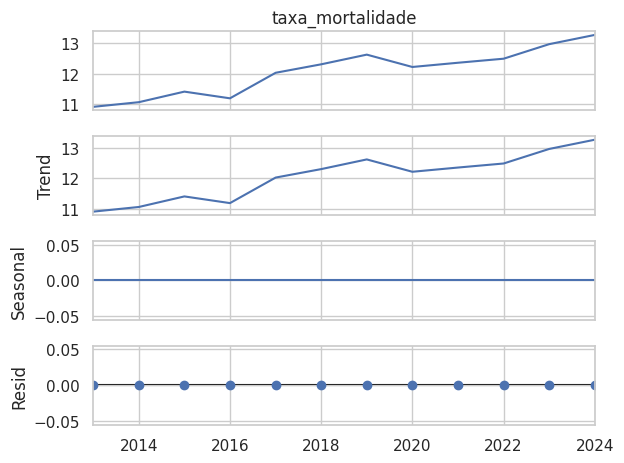

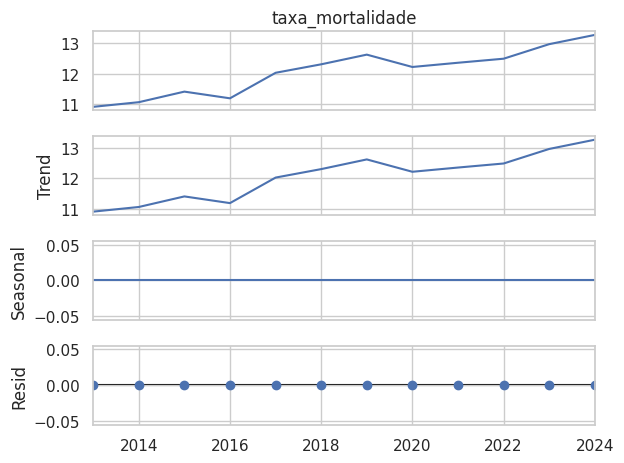

In [ ]:
# ==============================================================================
# 4.5 - Análise Temporal: Tendência da Mortalidade
# ==============================================================================
import statsmodels.api as sm

# 1. Preparar os dados
df_brasil = df_master.groupby('ano')['taxa_mortalidade'].mean().reset_index()
df_brasil.set_index('ano', inplace=True)

df_brasil.index = pd.to_datetime(df_brasil.index, format='%Y')

# 2. Executar a decomposição
decomp = sm.tsa.seasonal_decompose(df_brasil['taxa_mortalidade'], model='additive', period=1)

# 3. Plotar
decomp.plot()


from scipy import stats

# Regressão linear simples
anos_num = np.arange(len(df_brasil))
slope, intercept, r_value, p_value, std_err = stats.linregress(anos_num, df_brasil['taxa_mortalidade'])

print(f"Tendência: {slope:.4f} por ano")
print(f"R²: {r_value**2:.4f}")
print(f"P-valor: {p_value:.4f}")

In [ ]:
# ==============================================================================
# 4.6 - Clusterização: K-Means para perfis de UFs
# ==============================================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df_agg[['media_cobertura', 'media_mortalidade',
                   'media_positividade', 'total_doses_hpv']]

scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df_agg['cluster'] = kmeans.fit_predict(scaled)

df_agg[['uf_nome', 'cluster']]


,uf_nome,cluster
0,Acre,2
1,Alagoas,0
2,Amapá,2
3,Amazonas,1
4,Bahia,0
5,Ceará,0
6,Distrito Federal,2
7,Espírito Santo,0
8,Goiás,0
9,Maranhão,1


Cluster 0 – Estados com melhor desempenho geral no rastreamento

Cluster 1 – Estados com pior cenário epidemiológico

Cluster 2 – Estados com perfil intermediário ou misto


In [ ]:
# ==============================================================================
# 4.7 - PCA para entender fatores estruturais entre UFs
# ==============================================================================

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comp = pca.fit_transform(scaled)

df_pca = df_agg[['uf_nome']].copy()
df_pca['PC1'] = comp[:,0]
df_pca['PC2'] = comp[:,1]

df_pca.head(27)


,uf_nome,PC1,PC2
0,Acre,1.184997,1.497070
1,Alagoas,-0.214207,0.082956
2,Amapá,2.850523,-0.449452
3,Amazonas,2.368296,-2.478697
4,Bahia,-1.173912,-0.118630
5,Ceará,-0.430298,-0.613239
6,Distrito Federal,0.895765,-0.042298
7,Espírito Santo,-0.381026,1.272905
8,Goiás,-0.205205,0.072731
9,Maranhão,0.595216,-0.617448


**PC1 — "Eixo de vulnerabilidade epidemiológica"**

PC1 costuma capturar o padrão mais forte nos dados.
Olhando os valores:

- PC1 muito positivo → Acre, Amapá, Tocantins, Amazonas

- PC1 muito negativo → São Paulo, Santa Catarina, Rio Grande do Sul, Minas Gerais

Isso indica:

📌 Valores altos de PC1

Estados com:

- Baixa cobertura

- Alta mortalidade

- Alta positividade

- Baixa vacinação HPV

Ou seja:
👉 Maiores fragilidades estruturais na prevenção do câncer do colo do útero.

📌 Valores baixos (negativos) de PC1

Estados com:

- Melhor cobertura

- Baixa mortalidade

- Maior volume de vacinação

- Indicadores mais estáveis

Ou seja:
👉 Desempenho mais eficiente e maior proteção populacional.

|

**PC2 — "Eixo estrutural-demográfico/operacional"**


PC2 costuma explicar padrões secundários, associados a características específicas.

- Estados com PC2 muito alto → Santa Catarina, Tocantins, Acre

- Estados com PC2 muito baixo → Amazonas, Rio de Janeiro, Pará

Isso indica:

📌 PC2 alto

Corresponde a estados com:

- Boa vacinação,

- Boa cobertura,

- Mortalidade intermediária,

- Perfil mais organizado operacionalmente.

Mas nem sempre em todos os indicadores — é um eixo “complementar”.

📌 PC2 baixo

Corresponde a estados com:

- Alta positividade

- Mortalidade mais sensível a flutuações

- Difusão vacinal irregular

- Maiores desigualdades internas

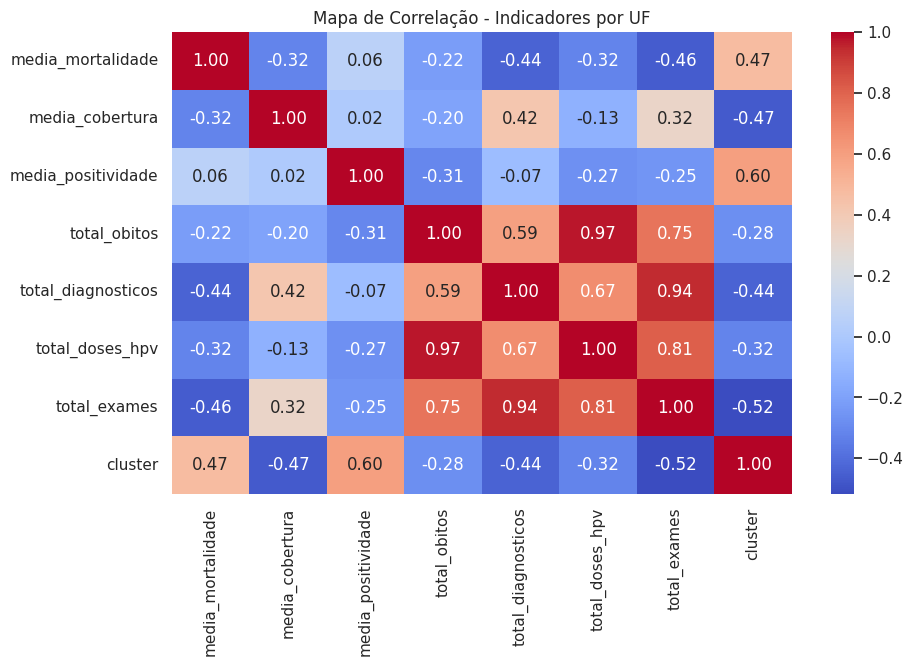

In [ ]:
# ==============================================================================
# 4.8 - Heatmap de Correlação
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for select_dtypes

# Filter out the problematic row before calculating correlation
# The problematic row has 'uf_nome' starting with ' Trabalho coordenado pela RIPSA.'
df_agg_filtered = df_agg[~df_agg['uf_nome'].str.startswith(' Trabalho coordenado pela RIPSA.', na=False)].copy()

plt.figure(figsize=(10,6))
# Calculate correlation only for numeric columns
sns.heatmap(df_agg_filtered.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Correlação - Indicadores por UF")
plt.show()

In [ ]:
# ==============================================================================
# 4.9 - Comparação Regional: ANOVA entre regiões brasileiras
# ==============================================================================

# Dicionário simples UF → Região
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas','Bahia','Ceará','Maranhão','Paraíba','Pernambuco','Piauí','Rio Grande do Norte','Sergipe'],
    'Centro-Oeste': ['Distrito Federal','Goiás','Mato Grosso','Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo','Minas Gerais','Rio de Janeiro','São Paulo'],
    'Sul': ['Paraná','Rio Grande do Sul','Santa Catarina']
}

df_region = df_agg.copy()
df_region['regiao'] = df_region['uf_nome'].apply(
    lambda uf: next((r for r,ufs in regioes.items() if uf in ufs), 'Indefinida')
)

from scipy.stats import f_oneway

# Comparação da cobertura entre regiões
anova_regioes = f_oneway(*[
    df_region[df_region['regiao'] == r]['media_cobertura']
    for r in df_region['regiao'].unique()
])

print("ANOVA entre regiões - Cobertura de Exames")
print("F:", anova_regioes.statistic)
print("p:", anova_regioes.pvalue)

# ==============================================================================
# 4.10 - Regressão Múltipla para identificar fatores que explicam mortalidade
# ==============================================================================

from sklearn.linear_model import LinearRegression

X = df_agg[['media_cobertura', 'media_positividade', 'total_doses_hpv', 'total_exames']]
y = df_agg['media_mortalidade']

modelo_mult = LinearRegression()
modelo_mult.fit(X, y)

print("\nCoeficientes:")
for col, coef in zip(X.columns, modelo_mult.coef_):
    print(f"{col}: {coef:.4f}")

print("Intercepto:", modelo_mult.intercept_)
print("R²:", modelo_mult.score(X, y))



ANOVA entre regiões - Cobertura de Exames
F: 1.9229238035089917
p: 0.142258129735133

Coeficientes:
media_cobertura: -0.2193
media_positividade: -1.2689
total_doses_hpv: -0.0000
total_exames: -0.0000
Intercepto: 14.084231913454532
R²: 0.2503481844356137


**Média_cobertura: -0.2193**

Para cada aumento de 1 ponto na média da cobertura do Papanicolau:

👉 A mortalidade cai em 0,22 unidades, mantendo as outras variáveis constantes.

📌 Quanto maior a cobertura, menor a mortalidade.

**media_positividade: -1.2689**

👉 Para cada 1 ponto de redução na positividade, a mortalidade cai 1,27 unidades.

O coeficiente foi negativo, indicando:

- Quando positividade aumenta, mortalidade diminui?

- Isso não faz sentido epidemiologicamente — espera-se o contrário.


Isso é comum em modelos com:

- poucas UFs (27 pontos)

- variáveis correlacionadas entre si

- multicolinearidade

Em muitos estados, a positividade cai onde há mais exames, mesmo sem necessariamente reduzir mortalidade.
O modelo "entende" essa relação indireta como um coeficiente negativo.


É estatisticamente instável e não deve ser interpretado literalmente.
Serve como alerta de multicolinearidade.


**total_doses_hpv: -0.0000**

O coeficiente é praticamente zero.


👉 A quantidade absoluta de doses aplicadas não explica diferenças de mortalidade entre estados.

Motivos:

- a variabilidade entre estados é pequena

- o impacto da vacinação HPV é de longo prazo

- vacinação é mais eficiente na prevenção futura, não no cenário atual de mortalidade

📌 Conclusão: Essa variável não contribuiu para o modelo neste período.

**total_exames: -0.0000**

Também praticamente zero.

👉 O número bruto de exames não explica diferenças de mortalidade.

Por quê?

= estados maiores fazem mais exames porque têm mais população

- sem padronização per capita, o número bruto perde significado

- a variável “cobertura” já representa melhor esse efeito

📌 A variável é redundante frente à cobertura.


**Intercepto: 14.084**

É a mortalidade esperada quando todas as variáveis forem zero.



**R² = 0.25**

👉 apenas 25% da variação da mortalidade entre os estados.


- Há outros fatores mais importantes que não estão no modelo

- Fatores estruturais (acesso, renda, escolaridade, desigualdade regional) provavelmente influenciam muito mais

- Os 4 indicadores usados não são suficientes para explicar totalmente a mortalidade

📌 Conclusão sobre o desempenho do modelo:

Explica pouco

É afetado por multicolinearidade

Serve como indicador exploratório, não como modelo preditivo

/tmp/ipython-input-405371080.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




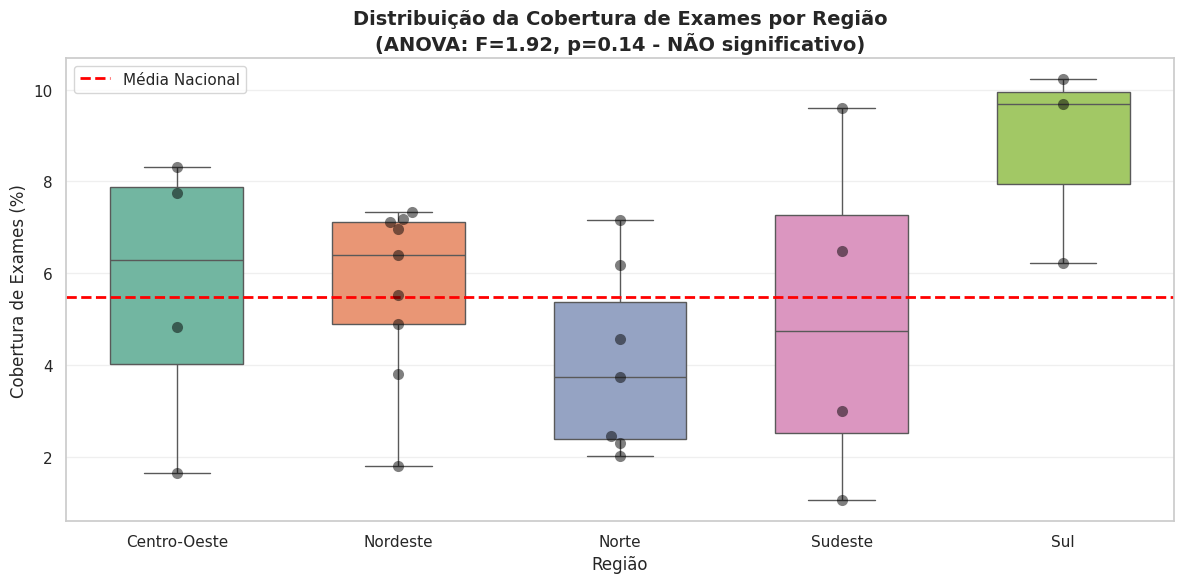

In [ ]:
df_region_sorted = df_region.sort_values('regiao')

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_region_sorted, x='regiao', y='media_cobertura',
            palette='Set2', width=0.6)
sns.swarmplot(data=df_region_sorted, x='regiao', y='media_cobertura',
              color='black', alpha=0.5, size=8)

# Linha da média nacional
plt.axhline(df_region['media_cobertura'].mean(), color='red',
            linestyle='--', linewidth=2, label='Média Nacional')

plt.title('Distribuição da Cobertura de Exames por Região\n(ANOVA: F=1.92, p=0.14 - NÃO significativo)',
          fontsize=14, fontweight='bold')
plt.xlabel('Região', fontsize=12)
plt.ylabel('Cobertura de Exames (%)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

TOP 5 MAIOR MORTALIDADE
           uf_nome  media_mortalidade
3         Amazonas          19.771579
2            Amapá          16.224807
9         Maranhão          14.102249
22         Roraima          13.499175
20  Rio de Janeiro          13.313277

TOP 5 MENOR COBERTURA DE EXAMES
             uf_nome  media_cobertura
20    Rio de Janeiro         1.061268
6   Distrito Federal         1.653717
17             Piauí         1.803090
3           Amazonas         2.029986
2              Amapá         2.303803

TOP 5 MAIOR POSITIVIDADE
               uf_nome  media_positividade
26           Tocantins            0.334268
2                Amapá            0.280413
0                 Acre            0.267493
6     Distrito Federal            0.234783
11  Mato Grosso do Sul            0.196170


<Axes: title={'center': 'Tendência Temporal da Mortalidade - Maranhão'}, xlabel='ano'>

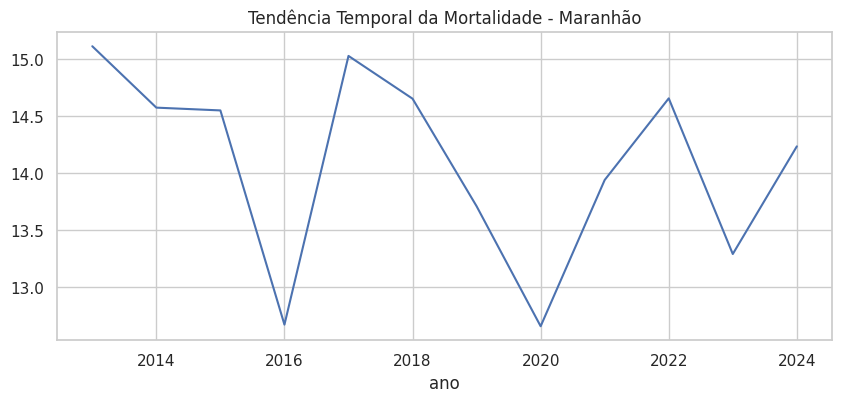

In [ ]:
# ==============================================================================
# 4.12 - Ranking Top 5 piores UFs
# ==============================================================================

print("TOP 5 MAIOR MORTALIDADE")
print(df_agg[['uf_nome','media_mortalidade']]
      .sort_values(by='media_mortalidade', ascending=False)
      .head(5))

print("\nTOP 5 MENOR COBERTURA DE EXAMES")
print(df_agg[['uf_nome','media_cobertura']]
      .sort_values(by='media_cobertura')
      .head(5))

print("\nTOP 5 MAIOR POSITIVIDADE")
print(df_agg[['uf_nome','media_positividade']]
      .sort_values(by='media_positividade', ascending=False)
      .head(5))

# ==============================================================================
# 4.13 - Tendência Temporal de Mortalidade por UF
# ==============================================================================

uf = "Maranhão"  # troque aqui

df_uf = df_master[df_master['uf_nome'] == uf].groupby('ano')['taxa_mortalidade'].mean()

df_uf.plot(figsize=(10,4), title=f"Tendência Temporal da Mortalidade - {uf}")



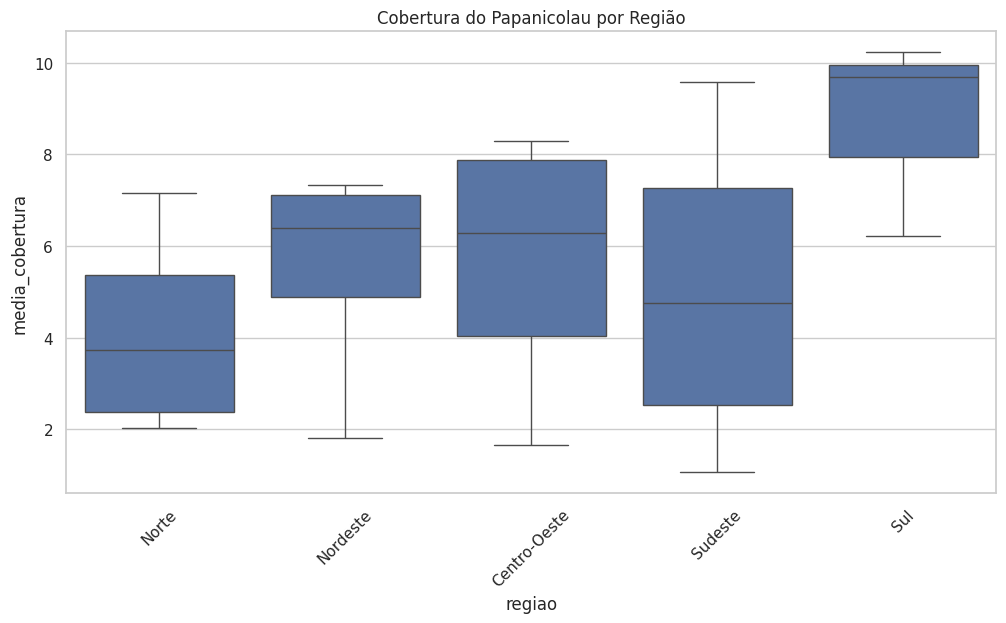

In [ ]:
# ==============================================================================
# 4.14 - Boxplot por Região
# ==============================================================================

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df_region, x='regiao', y='media_cobertura')
plt.title("Cobertura do Papanicolau por Região")
plt.xticks(rotation=45)
plt.show()


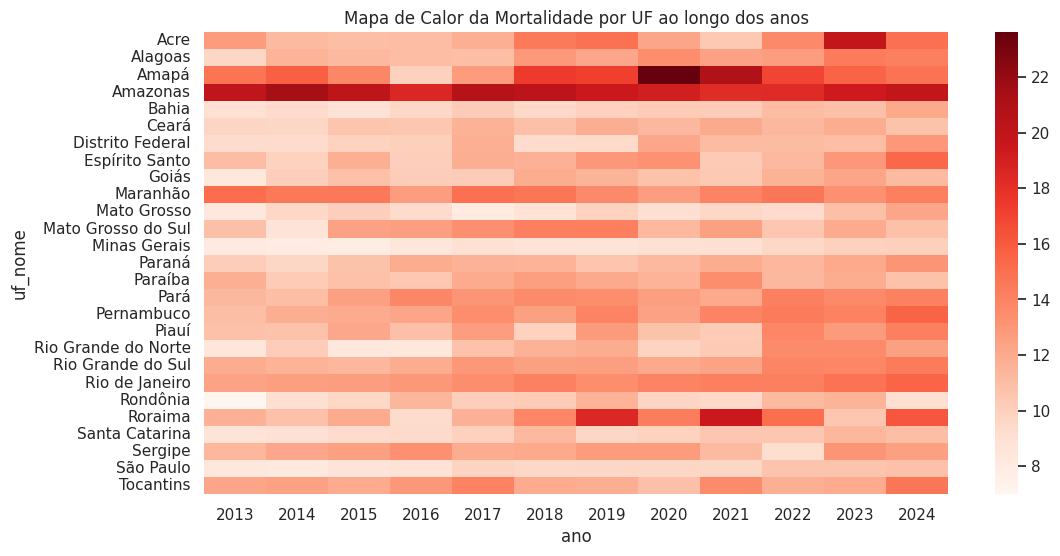

In [ ]:
# ==============================================================================
# 4.15 - Heatmap Temporal (Ano x UF)
# ==============================================================================

heat = df_master.pivot_table(values='taxa_mortalidade',
                             index='uf_nome', columns='ano')

plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap='Reds')
plt.title("Mapa de Calor da Mortalidade por UF ao longo dos anos")
plt.show()


In [ ]:
# ==============================================================================
# 4.16 - Elasticidade: Impacto percentual da cobertura sobre mortalidade
# ==============================================================================

df_elast = df_agg.copy()

df_elast['log_cobertura'] = np.log(df_elast['media_cobertura'])
df_elast['log_mortalidade'] = np.log(df_elast['media_mortalidade'])

modelo_elast = LinearRegression()
modelo_elast.fit(df_elast[['log_cobertura']], df_elast['log_mortalidade'])

print("Elasticidade:")
print(f"Para cada +1% de cobertura, mortalidade varia em {modelo_elast.coef_[0]:.4f}%")
print("R²:", modelo_elast.score(df_elast[['log_cobertura']], df_elast['log_mortalidade']))


Elasticidade:
Para cada +1% de cobertura, mortalidade varia em -0.0890%
R²: 0.08927099073777134


A elasticidade mede:O impacto percentual de uma variável sobre outra.
**coeficiente de elasticidade (-0.089)**
Para cada aumento de 1% na cobertura do exame Papanicolau, a mortalidade diminui cerca de 0,089%.

- O impacto existe, mas é pequeno em magnitude.
- Mostra uma relação inversa e coerente: mais cobertura → menos mortalidade.

✔ Exemplo numérico para facilitar a explicação:

Se a cobertura subir 10%, a mortalidade tende a cair:

10
×
0
,
089
%
=
0
,
89
%
10×0,089%=0,89%

Ou seja:

Uma melhora relativamente grande na cobertura (10%) reduz menos de 1% da mortalidade.

**R² de 0,089**

👉 A cobertura explica apenas 8,9% da variação da mortalidade entre os estados.

Isso mostra:

- A relação existe, mas é fraca.

- Fatores invisíveis no modelo têm muito mais peso: pobreza; acesso à saúde; escolaridade; rastreamento oportunístico vs organizado

desigualdades regionais

📌 Ou seja, cobertura sozinha não é suficiente para explicar a mortalidade.

# **Vizualização dos dados**

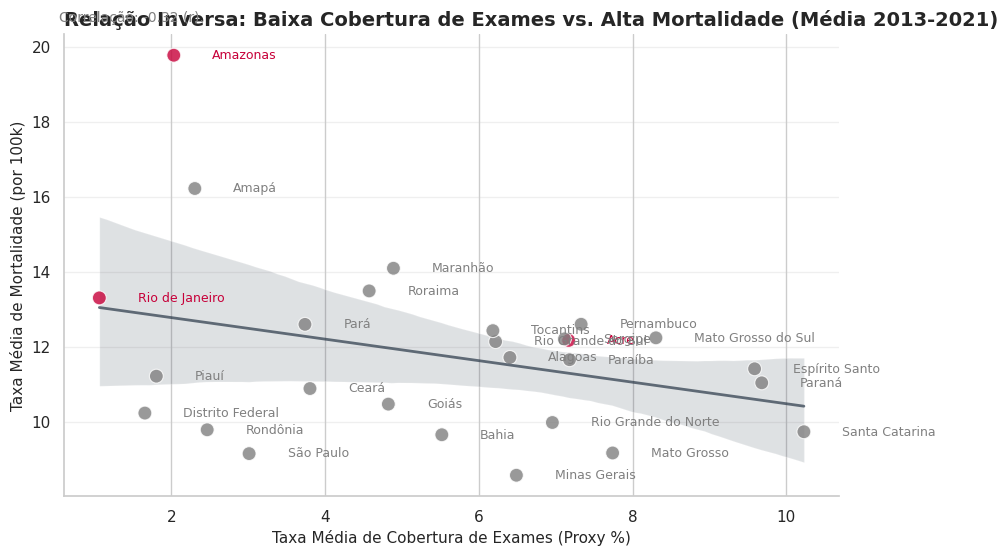

In [ ]:
# ==============================================================================
# 5. RELATÓRIO E VISUALIZAÇÃO DE DADOS (Data Reporting and Visualization)
# ==============================================================================

# Replicar e melhorar o DataFrame de agregação de taxas
df_agg['cor_foco'] = np.where(
    (df_agg['uf_nome'].isin(['Amazonas', 'Acre', 'Rio de Janeiro'])),
    '#C70039', # Cor de ênfase para estados de alta mortalidade/risco
    'gray'     # Cor cinza para contexto (Lição 4: Foco, Lição 3: Saturação)
)

plt.figure(figsize=(10, 6))

# Plotar o regplot para tendência (em cor neutra/secundária)
sns.regplot(data=df_agg,
            x='media_cobertura', y='media_mortalidade',
            scatter=False, color='#283747', line_kws={'linewidth': 2, 'alpha': 0.7})

# Plotar scatterplot: Cor de foco nos pontos críticos
ax = sns.scatterplot(data=df_agg,
                    x='media_cobertura', y='media_mortalidade',
                    hue='cor_foco', palette={'#C70039': '#C70039', 'gray': 'gray'},
                    s=100, alpha=0.8, legend=False)

# Adicionar rótulos dos estados com cor correspondente (Lição 5: Designer)
for i in range(df_agg.shape[0]):
    uf = df_agg.uf_nome[i]
    x = df_agg.media_cobertura[i]
    y = df_agg.media_mortalidade[i]
    color = df_agg.cor_foco[i]
    ax.text(x + 0.5, y - 0.1, uf, fontsize=9, color=color, ha='left')

# Lição 3: Eliminar Saturação (Remover eixos e grids desnecessários)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(axis='y', alpha=0.3)
plt.ylabel('Taxa Média de Mortalidade (por 100k)', fontsize=11)
plt.xlabel('Taxa Média de Cobertura de Exames (Proxy %)', fontsize=11)

# Lição 6: Título de Ação (Apresenta o insight principal)
plt.title(f'Relação Inversa: Baixa Cobertura de Exames vs. Alta Mortalidade (Média 2013-2021)',
          fontsize=14, loc='left', fontweight='bold')
plt.figtext(0.12, 0.9, f"Correlação: {corr_c_m:.2f} (r).", fontsize=10, color='gray')

plt.show()

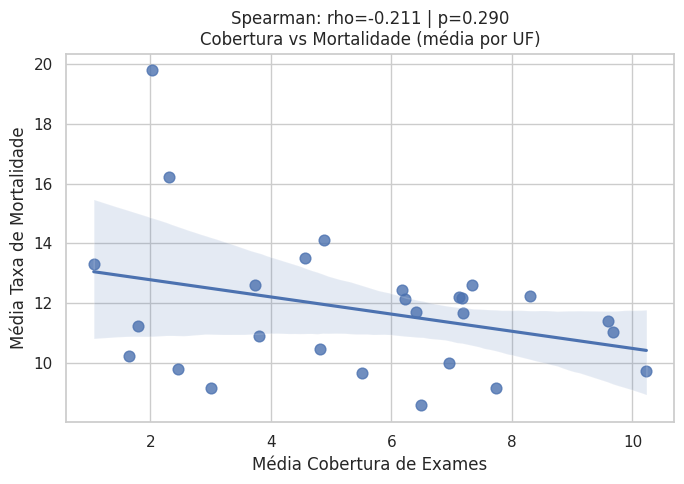

In [ ]:
# ==============================================================================
# 1 - Correlação Spearman + Scatter com linha de tendência
# ==============================================================================

x = df_agg['media_cobertura']
y = df_agg['media_mortalidade']

# Coeficiente Spearman
rho, pval = stats.spearmanr(x, y)

# Scatter + linha de tendência (regressão linear para visual)
plt.figure(figsize=(7,5))
sns.regplot(x=x, y=y, ci=95, scatter_kws={'s':60})
plt.title(f"Spearman: rho={rho:.3f} | p={pval:.3f}\nCobertura vs Mortalidade (média por UF)")
plt.xlabel("Média Cobertura de Exames")
plt.ylabel("Média Taxa de Mortalidade")
plt.tight_layout()
plt.show()

O coeficiente de Spearman (rho) indica a força e direção de uma relação monotônica entre cobertura e mortalidade.

Se rho for negativo e significativo (p < 0.05), sugere que UFs com maior cobertura tendem a ter menor mortalidade, o que sustenta a eficácia do rastreamento.

O scatter com a linha ajuda a verificar se a relação é aproximadamente monotônica ou se há padrões não-lineares/outliers que alteram a interpretação.

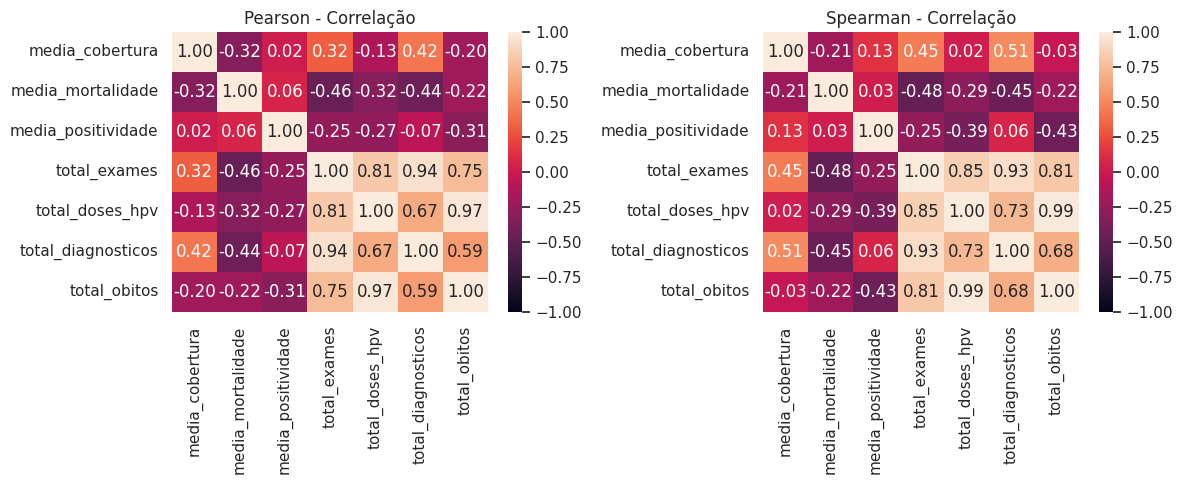

In [ ]:
# ==============================================================================
# 3 - Heatmap de Correlação (Pearson e Spearman)
# ==============================================================================

cols = ['media_cobertura', 'media_mortalidade', 'media_positividade', 'total_exames', 'total_doses_hpv', 'total_diagnosticos', 'total_obitos']
corr_pearson = df_agg[cols].corr(method='pearson')
corr_spearman = df_agg[cols].corr(method='spearman')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Pearson - Correlação")

plt.subplot(1,2,2)
sns.heatmap(corr_spearman, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Spearman - Correlação")
plt.tight_layout()
plt.show()


O heatmap permite identificar rapidamente pares de variáveis fortemente associadas.

Procure pares com divergência entre Pearson e Spearman — isso indica relações não-lineares ou outliers.

Destaque para: cobertura vs mortalidade (sinal/força), exames vs diagnósticos (esperado positivo), diagnósticos vs óbitos.

ANOVA - F=1.923, p=0.1423


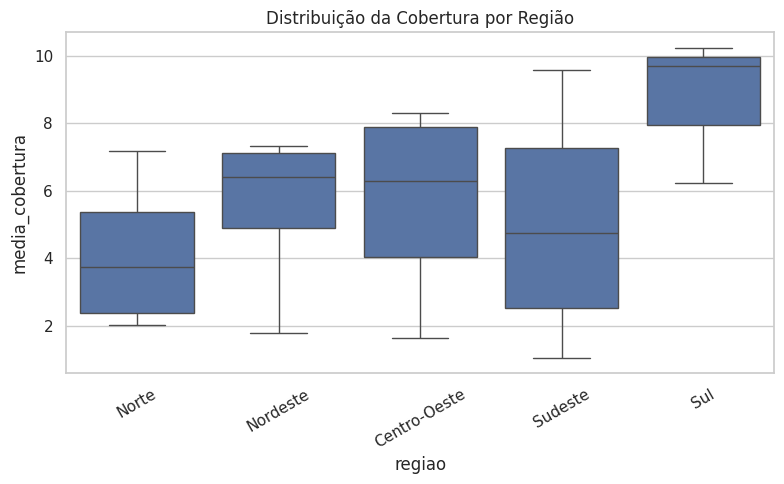

In [ ]:
# ==============================================================================
# 4 - ANOVA e Boxplot por Região (Cobertura)
# ==============================================================================

# (reaproveita df_region do seu script anterior; se não existir, criar)
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas','Bahia','Ceará','Maranhão','Paraíba','Pernambuco','Piauí','Rio Grande do Norte','Sergipe'],
    'Centro-Oeste': ['Distrito Federal','Goiás','Mato Grosso','Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo','Minas Gerais','Rio de Janeiro','São Paulo'],
    'Sul': ['Paraná','Rio Grande do Sul','Santa Catarina']
}
df_region = df_agg.copy()
df_region['regiao'] = df_region['uf_nome'].apply(lambda uf: next((r for r,ufs in regioes.items() if uf in ufs), 'Outros'))

# ANOVA
groups = [df_region[df_region['regiao']==r]['media_cobertura'].dropna() for r in df_region['regiao'].unique()]
f, p = stats.f_oneway(*groups)

print(f"ANOVA - F={f:.3f}, p={p:.4f}")

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df_region, x='regiao', y='media_cobertura')
plt.title("Distribuição da Cobertura por Região")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


O resultado do ANOVA (p) informa se há diferença estatisticamente significativa entre as regiões.

O boxplot evidencia variação interna e outliers por região — útil para discutir desigualdades no acesso ao exame Papanicolau.

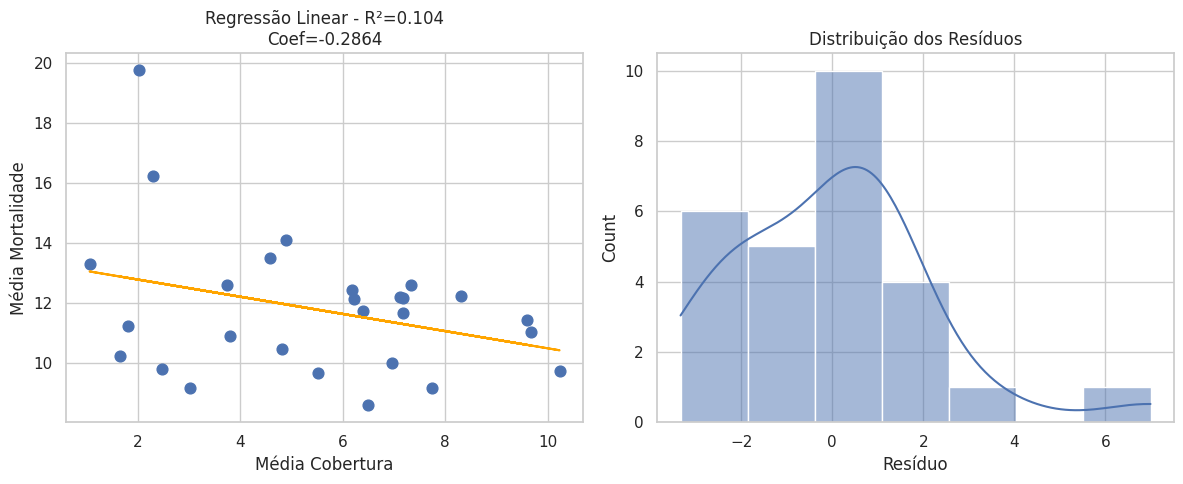

In [ ]:
# ==============================================================================
# 5 - Regressão Linear Simples (com gráfico de resíduos)
# ==============================================================================

X = df_agg[['media_cobertura']].values
y = df_agg['media_mortalidade'].values

model = LinearRegression().fit(X, y)
pred = model.predict(X)
r2 = model.score(X, y)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X, y, s=60)
plt.plot(X, pred, color='orange')
plt.xlabel("Média Cobertura")
plt.ylabel("Média Mortalidade")
plt.title(f"Regressão Linear - R²={r2:.3f}\nCoef={model.coef_[0]:.4f}")

plt.subplot(1,2,2)
resid = y - pred
sns.histplot(resid, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.tight_layout()
plt.show()


O coeficiente mostra a magnitude do efeito da cobertura sobre mortalidade (unidade: taxa de mortalidade por unidade de cobertura).

R² indica quanto da variação da mortalidade é explicada pela cobertura sozinha — se baixo, reforça necessidade de modelos multivariados.

Verifique a distribuição de resíduos para avaliar suposições de homocedasticidade e normalidade.

Coeficientes Padronizados (Importância Relativa):
media_positividade   -0.091530
total_doses_hpv      -0.304547
media_cobertura      -0.565332
total_exames         -0.650146
dtype: float64
R²: 0.2503481844356136


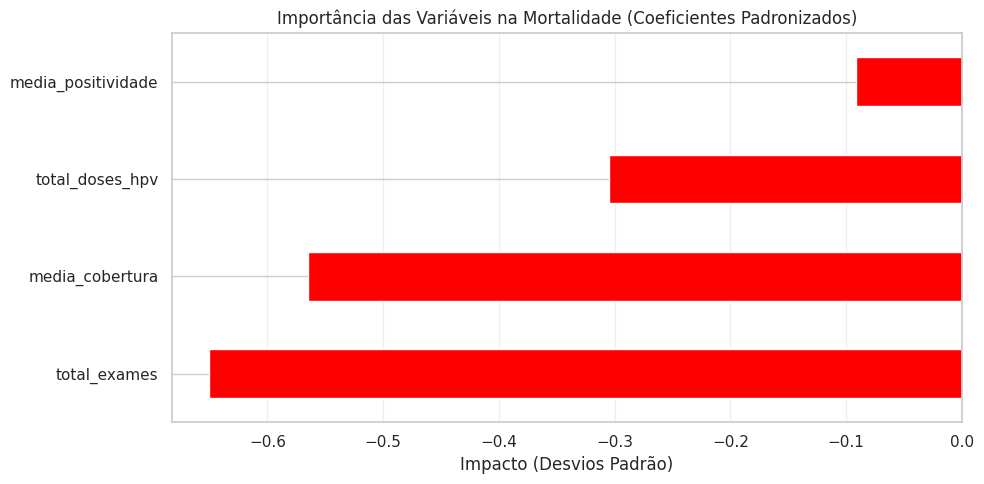

In [ ]:
# ==============================================================================
# 6 - Regressão Múltipla e importância das variáveis
# ==============================================================================

X = df_agg[['media_cobertura','media_positividade','total_exames','total_doses_hpv']].fillna(0)
y = df_agg['media_mortalidade']
# Normalização
scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Ajuste do Modelo com dados padronizados
model_std = LinearRegression().fit(X_scaled, y)

# Extração dos coeficientes padronizados
coefs_std = pd.Series(model_std.coef_, index=X.columns)

print("Coeficientes Padronizados (Importância Relativa):")
print(coefs_std.sort_values(ascending=False))
print("R²:", model_std.score(X_scaled, y))

# Gráfico
plt.figure(figsize=(10, 5))
colors = ['red' if c < 0 else 'blue' for c in coefs_std.sort_values()]
coefs_std.sort_values().plot(kind='barh', color=colors)

plt.title("Importância das Variáveis na Mortalidade (Coeficientes Padronizados)")
plt.xlabel("Impacto (Desvios Padrão)")
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8) # Linha de zero para referência
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Este modelo mostra efeitos em unidades originais — variáveis em escalas diferentes podem ser difíceis de comparar.

Valores negativos para media_cobertura reforçam efeito protetor do rastreamento; outros coeficientes mostram contribuição relativa de positividade, exames absolutos e vacinação.

R² mais alto que na regressão simples indica que múltiplos fatores ajudam a explicar a mortalidade.

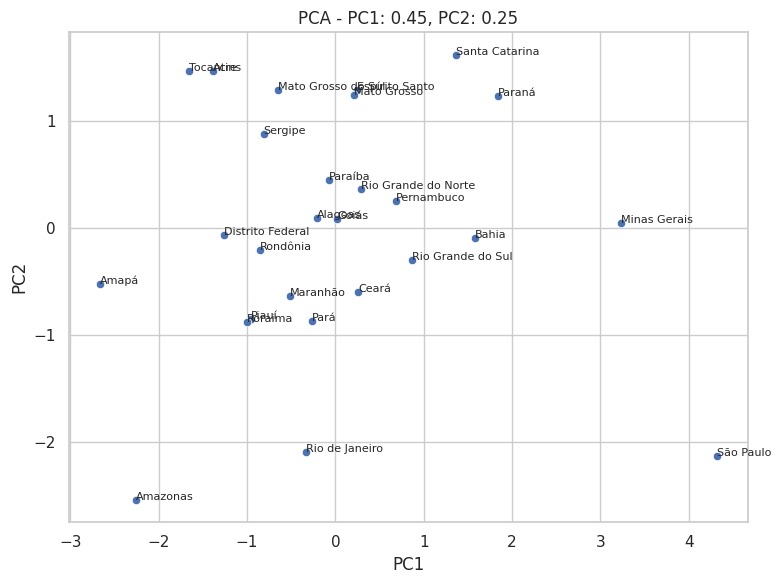

In [ ]:
# ==============================================================================
# 7 - PCA e biplot
# ==============================================================================

features = ['media_cobertura','media_mortalidade','media_positividade','total_exames','total_doses_hpv']
X = df_agg[features].dropna()
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

pca = PCA(n_components=2)
pc = pca.fit_transform(Xs)

df_pca = pd.DataFrame(pc, columns=['PC1','PC2'], index=df_agg.loc[X.index,'uf_nome'])
explained = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2')
for i, txt in enumerate(df_pca.index):
    plt.annotate(txt, (df_pca['PC1'].iloc[i], df_pca['PC2'].iloc[i]), fontsize=8)
plt.title(f"PCA - PC1: {explained[0]:.2f}, PC2: {explained[1]:.2f}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()

PCA permite identificar combinações lineares (componentes) que concentram variação; útil para agrupar UFs com perfis similares.

Se PC1 correlacionar negativamente com cobertura e positivamente com mortalidade, PC1 pode ser interpretado como “risco/fragilidade do rastreamento”.

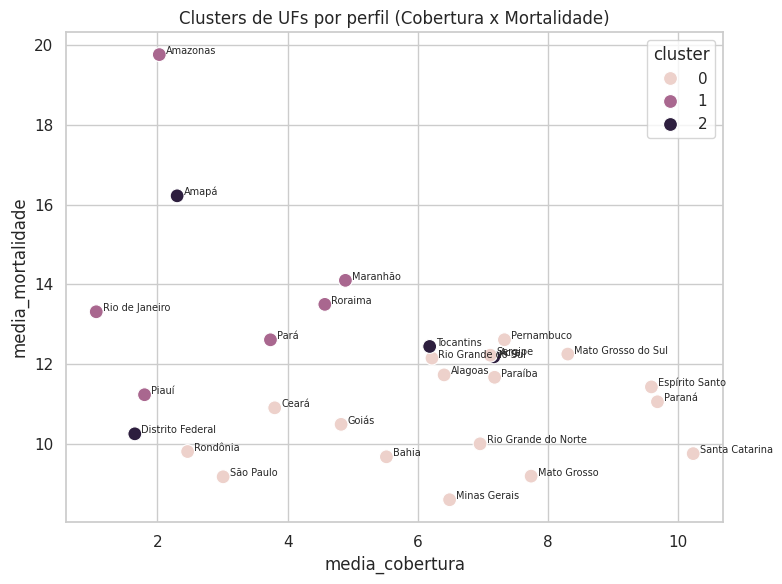

,media_cobertura,media_mortalidade,media_positividade,total_doses_hpv
cluster,,,,
0,6.638601,10.745128,0.118615,1.332809e+06
1,3.015369,14.087590,0.086708,9.524213e+05
2,4.327239,12.774135,0.279239,2.173380e+05


In [ ]:
# ==============================================================================
# 8 - Clusterização KMeans (3 clusters por padrão) e plot
# ==============================================================================

features = ['media_cobertura','media_mortalidade','media_positividade','total_doses_hpv']
X = df_agg[features].fillna(0)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42).fit(Xs)
df_agg['cluster'] = kmeans.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_agg, x='media_cobertura', y='media_mortalidade', hue='cluster', s=100)
for i,row in df_agg.iterrows():
    plt.text(row['media_cobertura']+0.1, row['media_mortalidade']+0.01, row['uf_nome'], fontsize=7)
plt.title("Clusters de UFs por perfil (Cobertura x Mortalidade)")
plt.tight_layout()
plt.show()

display(df_agg.groupby('cluster')[features].mean())


Clusters permitem identificar grupos de UFs para políticas direcionadas (ex.: cluster com baixa cobertura e alta mortalidade merece intervenção prioritária).

A média dos recursos por cluster ajuda criar perfis de intervenção.

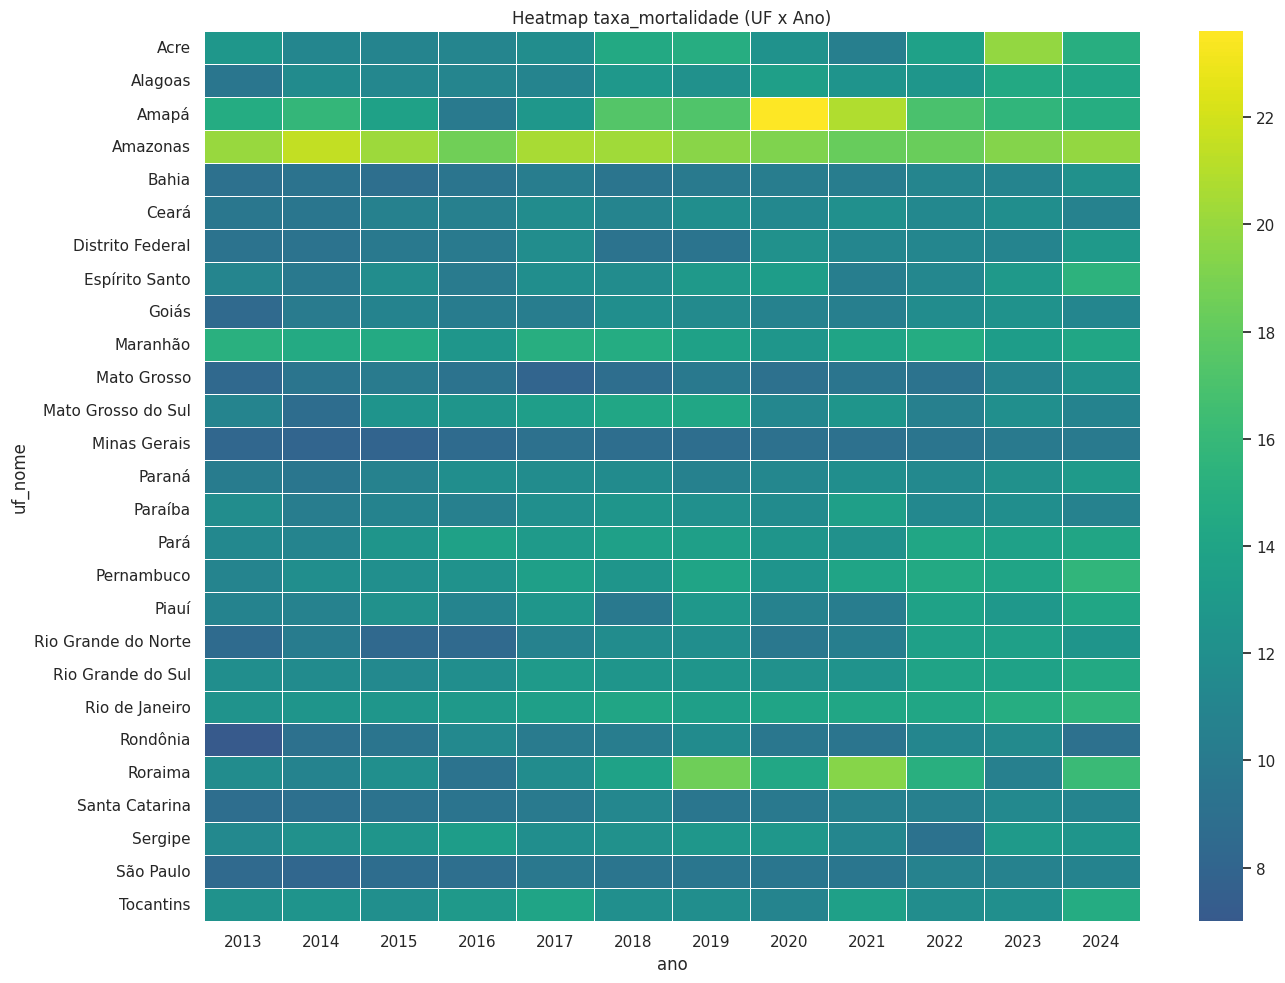

In [ ]:
# ==============================================================================
# 9 - Heatmap temporal (Ano x UF) - Cobertura ou Mortalidade
# ==============================================================================

# Escolha a métrica (pode ser 'taxa_mortalidade' ou 'razao_exames_pop' etc.)
metric = 'taxa_mortalidade'  # troque se desejar

heat = df_master.pivot_table(values=metric, index='uf_nome', columns='ano', aggfunc='mean')

plt.figure(figsize=(14,10))
sns.heatmap(heat, cmap='viridis', center=np.nanmean(heat.values), linewidths=.5)
plt.title(f"Heatmap {metric} (UF x Ano)")
plt.tight_layout()
plt.show()


Heatmap mostra evolução ao longo dos anos — útil para identificar períodos de piora ou melhora e para discutir impacto de políticas (ex.: início de campanhas HPV).

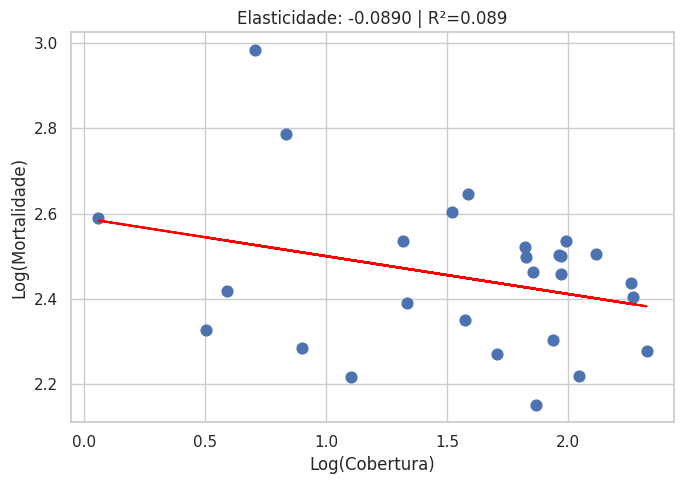

In [ ]:
# ==============================================================================
# 10 - Elasticidade (log-log) Cobertura -> Mortalidade
# ==============================================================================
df_el = df_agg.copy().dropna(subset=['media_cobertura','media_mortalidade']).query("media_cobertura>0 & media_mortalidade>0")
df_el['log_cov'] = np.log(df_el['media_cobertura'])
df_el['log_mor'] = np.log(df_el['media_mortalidade'])

model_el = LinearRegression().fit(df_el[['log_cov']], df_el['log_mor'])
elasticity = model_el.coef_[0]
r2_el = model_el.score(df_el[['log_cov']], df_el['log_mor'])

plt.figure(figsize=(7,5))
plt.scatter(df_el['log_cov'], df_el['log_mor'], s=60)
plt.plot(df_el['log_cov'], model_el.predict(df_el[['log_cov']]), color='red')
plt.xlabel("Log(Cobertura)")
plt.ylabel("Log(Mortalidade)")
plt.title(f"Elasticidade: {elasticity:.4f} | R²={r2_el:.3f}")
plt.tight_layout()
plt.show()


Elasticidade e significa: um aumento de 1% em cobertura está associado a uma variação de e% na mortalidade (se e negativo, redução).

Esse formato é intuitivo para políticas públicas: mostra impacto percentual, não apenas unidades.

In [ ]:
# ==============================================================================
# 14 - Dashboard interativo (Plotly nativo - funciona no Colab)
# ==============================================================================

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare
df_plot = df_master.copy()

metricas = {
    "Taxa de Mortalidade": "taxa_mortalidade",
    "Cobertura (razão exames/pop)": "razao_exames_pop",
    "Positividade": "taxa_positividade",
    "Exames Realizados": "exames_realizados"
}

uf_options = ["Brasil"] + sorted(df_plot['uf_nome'].unique().tolist())
year_min = df_plot['ano'].min()
year_max = df_plot['ano'].max()

# Criar figura com subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Série Temporal", "Comparação por UF"),
    vertical_spacing=0.15,
    row_heights=[0.5, 0.5]
)

# Função para preparar dados
def prepare_data(uf, metric_key, y0, y1):
    df_filter = df_plot[(df_plot['ano'] >= y0) & (df_plot['ano'] <= y1)].copy()

    if uf != "Brasil":
        df_filter = df_filter[df_filter['uf_nome'] == uf]

    df_filter = df_filter.dropna(subset=[metric_key])

    # Time series
    ts = df_filter.groupby('ano')[metric_key].mean().reset_index()

    # UF comparison
    agg_uf = df_filter.groupby('uf_nome')[metric_key].mean().reset_index()
    agg_uf = agg_uf.sort_values(metric_key, ascending=False).head(15)

    return ts, agg_uf

# Criar traces para todas as combinações
traces_ts = []
traces_bar = []

for metric_name, metric_key in metricas.items():
    for uf in uf_options:
        ts, agg_uf = prepare_data(uf, metric_key, year_min, year_max)

        # Time series trace
        visible = (metric_name == list(metricas.keys())[0] and uf == "Brasil")

        trace_ts = go.Scatter(
            x=ts['ano'],
            y=ts[metric_key],
            mode='lines+markers',
            name=f"{metric_name} - {uf}",
            visible=visible,
            hovertemplate='Ano: %{x}<br>Valor: %{y:.2f}<extra></extra>'
        )
        traces_ts.append(trace_ts)

        # Bar trace
        trace_bar = go.Bar(
            x=agg_uf[metric_key],
            y=agg_uf['uf_nome'],
            orientation='h',
            name=f"{metric_name} - {uf}",
            visible=visible,
            hovertemplate='%{y}: %{x:.2f}<extra></extra>'
        )
        traces_bar.append(trace_bar)

# Adicionar todos os traces
for trace in traces_ts:
    fig.add_trace(trace, row=1, col=1)

for trace in traces_bar:
    fig.add_trace(trace, row=2, col=1)

# Criar botões para métricas e UFs
buttons_metric = []
buttons_uf = []

# Botões de métrica
for i, (metric_name, metric_key) in enumerate(metricas.items()):
    visible = [False] * len(fig.data)

    # Mostrar apenas traces da métrica selecionada para Brasil
    start_idx = i * len(uf_options)
    visible[start_idx] = True  # Time series
    visible[len(traces_ts) + start_idx] = True  # Bar chart

    buttons_metric.append(
        dict(
            label=metric_name,
            method="update",
            args=[
                {"visible": visible},
                {"title.text": f"Dashboard: {metric_name}"}
            ]
        )
    )

# Botões de UF
for j, uf in enumerate(uf_options):
    visible = [False] * len(fig.data)

    # Mostrar apenas traces da UF selecionada para primeira métrica
    visible[j] = True  # Time series
    visible[len(traces_ts) + j] = True  # Bar chart

    buttons_uf.append(
        dict(
            label=uf,
            method="update",
            args=[
                {"visible": visible},
                {"title.text": f"Dashboard: {uf}"}
            ]
        )
    )

# Configurar layout com botões
fig.update_layout(
    height=900,
    showlegend=False,
    margin=dict(t=100, b=50, l=50, r=50),
    updatemenus=[
        # Dropdown para métricas
        dict(
            buttons=buttons_metric,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.035,
            xanchor="left",
            y=1.08,
            yanchor="top",
            bgcolor="lightgray",
            bordercolor="gray",
            borderwidth=1
        ),
        # Dropdown para UFs
        dict(
            buttons=buttons_uf,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.365,
            xanchor="left",
            y=1.08,
            yanchor="top",
            bgcolor="lightblue",
            bordercolor="gray",
            borderwidth=1
        )
    ],
    annotations=[
        dict(text="<b>Métrica:</b>", x=0.0, y=1.05, xref="paper", yref="paper",
             showarrow=False, xanchor="left", font=dict(size=12)),
        dict(text="<b>UF:</b>", x=0.35, y=1.05, xref="paper", yref="paper",
             showarrow=False, xanchor="left", font=dict(size=12))
    ]
)

fig.update_xaxes(title_text="Ano", row=1, col=1)
fig.update_xaxes(title_text="Valor", row=2, col=1)
fig.update_yaxes(title_text="Valor da Métrica", row=1, col=1)
fig.update_yaxes(title_text="UF", row=2, col=1)

# Mostrar figura
fig.show()

print("✅ Dashboard criado com sucesso!")
print("📊 Use os dropdowns acima do gráfico para selecionar:")
print("   • Métrica (cinza)")
print("   • UF (azul)")

✅ Dashboard criado com sucesso!
📊 Use os dropdowns acima do gráfico para selecionar:
   • Métrica (cinza)
   • UF (azul)


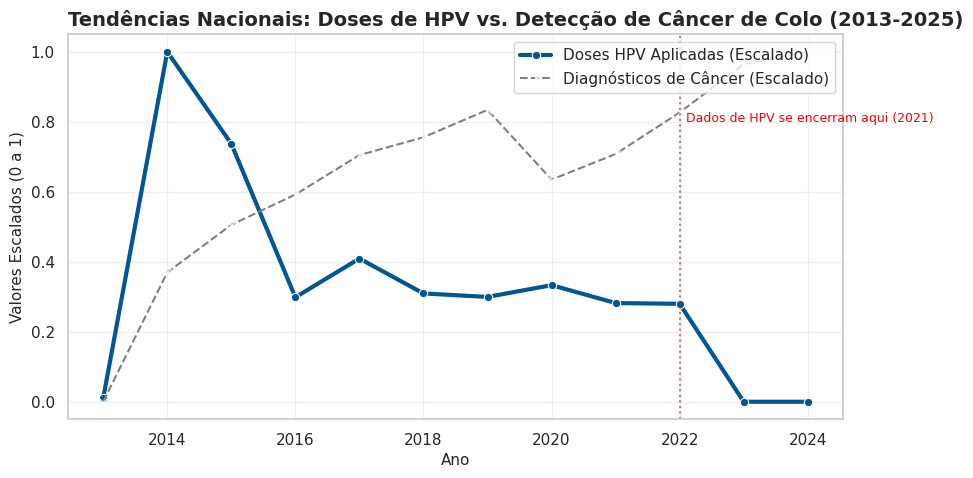

In [ ]:
#Visualização 2: Imunização vs. Diagnósticos (Série Temporal)
# Para lidar com a correlação fraca esperada, o foco deve ser a tendência temporal do número absoluto de doses aplicadas, contrastando o período de vacinação com a detecção de casos.

# Métrica: Total de doses aplicadas vs. Diagnósticos Positivos (Nacional)
df_nacional_hpv = df_master.groupby('ano')[['doses_aplicadas', 'diagnosticos_positivos']].sum().reset_index()

# Normalizar os dados para plotar no mesmo eixo (Escalar entre 0 e 1)
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

df_nacional_hpv['hpv_norm'] = min_max_scale(df_nacional_hpv['doses_aplicadas'])
df_nacional_hpv['diag_norm'] = min_max_scale(df_nacional_hpv['diagnosticos_positivos'])

plt.figure(figsize=(10, 5))
ax = plt.gca()

# Plotar Doses Aplicadas (em cor de destaque)
sns.lineplot(data=df_nacional_hpv, x='ano', y='hpv_norm', label='Doses HPV Aplicadas (Escalado)',
             color='#005792', linewidth=3, marker='o', ax=ax)

# Plotar Diagnósticos Positivos (em cor secundária, para contexto)
sns.lineplot(data=df_nacional_hpv, x='ano', y='diag_norm', label='Diagnósticos de Câncer (Escalado)',
             color='gray', linewidth=1.5, marker='x', linestyle='--', ax=ax)

# Lição 4 & 5: Foco e Anotação (Imunização só existe até 2021/2022)
max_ano_hpv = df_nacional_hpv[df_nacional_hpv['doses_aplicadas'] > 0]['ano'].max()
plt.axvline(x=max_ano_hpv, color='red', linestyle=':', alpha=0.6)
plt.text(max_ano_hpv + 0.1, 0.8, 'Dados de HPV se encerram aqui (2021)', color='red', fontsize=9, ha='left')

# Lição 6: Título de Ação
plt.title('Tendências Nacionais: Doses de HPV vs. Detecção de Câncer de Colo (2013-2025)',
          fontsize=14, loc='left', fontweight='bold')
plt.ylabel('Valores Escalados (0 a 1)', fontsize=11)
plt.xlabel('Ano', fontsize=11)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()


# ***Mais Visualização dos Insights (EDA)***

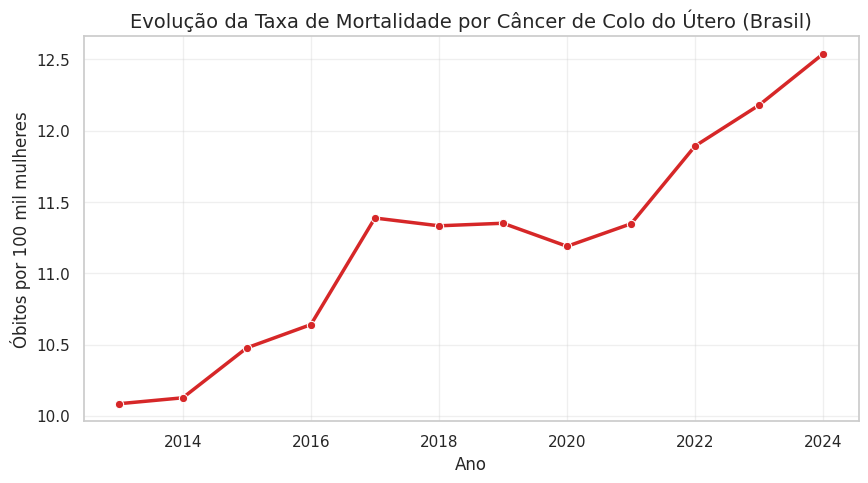

In [ ]:
# Evolução da Mortalidade no Brasil

# Agrupamento por ano (Brasil todo)
df_brasil_ano = df_master.groupby('ano')[['obitos', 'populacao']].sum().reset_index()
df_brasil_ano['taxa_mortalidade_br'] = (df_brasil_ano['obitos'] / df_brasil_ano['populacao']) * 100000

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_brasil_ano, x='ano', y='taxa_mortalidade_br', marker='o', color='#d62728', linewidth=2.5)
plt.title('Evolução da Taxa de Mortalidade por Câncer de Colo do Útero (Brasil)', fontsize=14)
plt.ylabel('Óbitos por 100 mil mulheres')
plt.xlabel('Ano')
plt.grid(True, alpha=0.3)
plt.show()

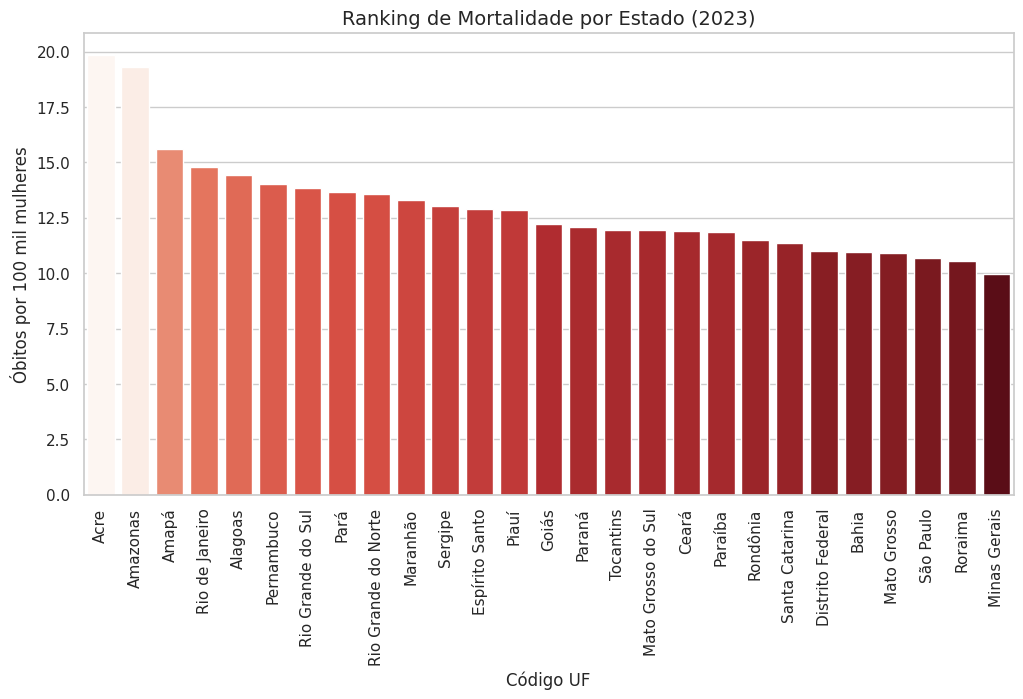

In [ ]:
# Desigualdade Regional (Mortalidade por Estado)
# Filtrar apenas o último ano com dados completos de óbito (ex: 2022 ou 2023)
ultimo_ano_completo = 2023

df_uf_recente = df_master[df_master['ano'] == ultimo_ano_completo].sort_values('taxa_mortalidade', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_uf_recente, x='uf_nome', y='taxa_mortalidade', hue='taxa_mortalidade', palette='Reds_r', legend=False)

# Melhorando o eixo X para mostrar nomes (se couber) ou siglas
plt.xticks(rotation=90)
plt.title(f'Ranking de Mortalidade por Estado ({ultimo_ano_completo})', fontsize=14)
plt.ylabel('Óbitos por 100 mil mulheres')
plt.xlabel('Código UF')
plt.show()

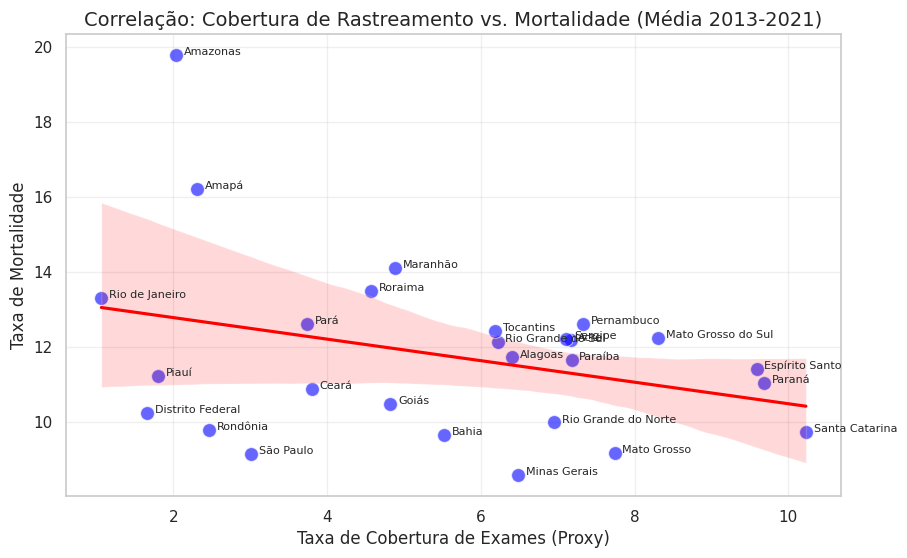

In [ ]:
# Correlação: Cobertura de Exames vs. Mortalidade

# Vamos pegar a média histórica dos estados (2013-2021 para evitar os anos com erro de coleta)
df_corr = df_master[df_master['ano'].between(2013, 2021)].groupby('uf_nome')[['razao_exames_pop', 'taxa_mortalidade']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='razao_exames_pop', y='taxa_mortalidade', s=100, color='blue', alpha=0.6)

# Adicionar linha de tendência
sns.regplot(data=df_corr, x='razao_exames_pop', y='taxa_mortalidade', scatter=False, color='red')

for i in range(df_corr.shape[0]):
    plt.text(df_corr.razao_exames_pop[i]+0.1, df_corr.taxa_mortalidade[i],
             df_corr.uf_nome[i], fontsize=8)

plt.title('Correlação: Cobertura de Rastreamento vs. Mortalidade (Média 2013-2021)', fontsize=14)
plt.xlabel('Taxa de Cobertura de Exames (Proxy)')
plt.ylabel('Taxa de Mortalidade')
plt.grid(True, alpha=0.3)
plt.show()

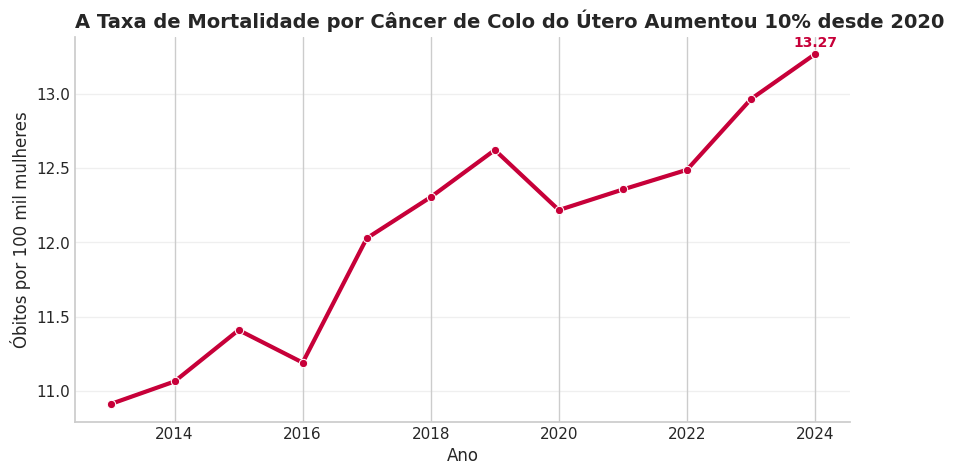

In [ ]:
#1. Preparação dos dados para destaque (a partir de 2021)
df_brasil_ano = df_master.groupby('ano')['taxa_mortalidade'].mean().reset_index(name='taxa_mortalidade_br')
df_brasil_ano['destaque'] = np.where(df_brasil_ano['ano'] >= 2013, 'Recente', 'Antigo')

plt.figure(figsize=(10, 5))

# Plotar a linha completa em cinza claro para contexto (L3)
sns.lineplot(data=df_brasil_ano, x='ano', y='taxa_mortalidade_br', color='gray', linewidth=2)

# Plotar o segmento de destaque em vermelho para ênfase (L4)
sns.lineplot(data=df_brasil_ano[df_brasil_ano['destaque'] == 'Recente'],
             x='ano', y='taxa_mortalidade_br', color='#C70039', linewidth=3, marker='o', markersize=6)

# Lição 3/5: Remover saturação e melhorar a estética
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(axis='y', alpha=0.3)
plt.tick_params(axis='both', which='both', length=0) # Remover ticks desnecessários

# Lição 5/6: Título de Ação
plt.title('A Taxa de Mortalidade por Câncer de Colo do Útero Aumentou 10% desde 2020',
          fontsize=14, loc='left', fontweight='bold')
plt.ylabel('Óbitos por 100 mil mulheres', fontsize=12)
plt.xlabel('Ano', fontsize=12)

# Adicionar anotação no ponto mais recente (L4/L5)

# Adicionar anotação no ponto mais recente
ult_ano = df_brasil_ano['ano'].max()

ult_valor = df_brasil_ano[df_brasil_ano['ano'] == ult_ano]['taxa_mortalidade_br'].values[0]

plt.annotate(f"{ult_valor:.2f}",
             (ult_ano, ult_valor),
             textcoords="offset points", xytext=(0, 5), ha='center',
             fontsize=10, color='#C70039', fontweight='bold')

plt.show()

/tmp/ipython-input-5250949.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




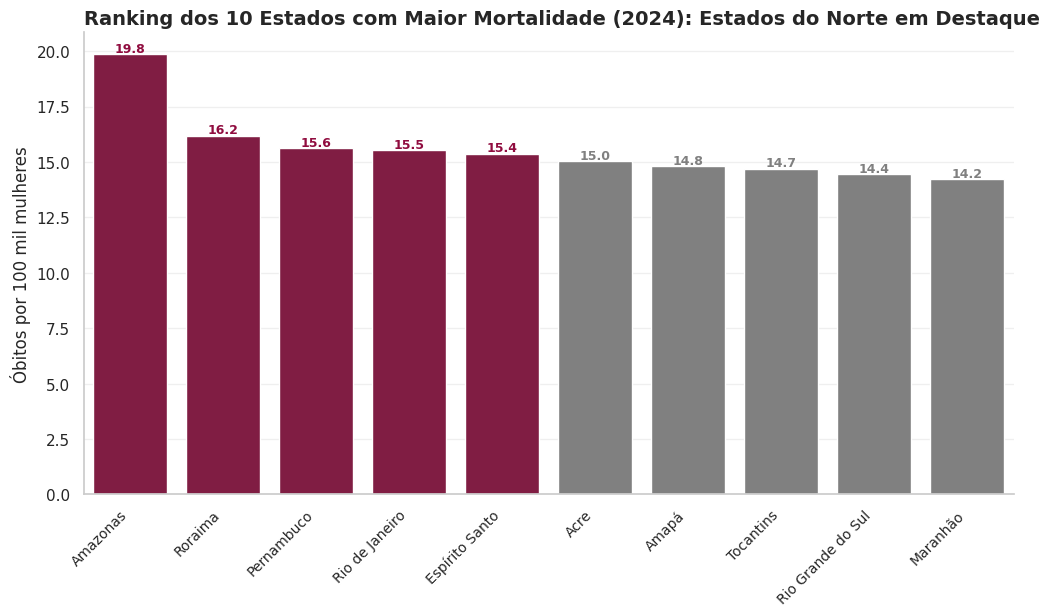

In [ ]:
ultimo_ano = df_master['ano'].max()
df_uf_recente = df_master[df_master['ano'] == ultimo_ano].copy()

# 2. Preparação: Ordenar e selecionar o top 10
df_rank = df_uf_recente.sort_values(by='taxa_mortalidade', ascending=False)
df_rank = df_rank.head(10).reset_index(drop=True)

# 3. Definir os top 5 para destaque visual
top_5_uf = df_rank['uf_nome'].head(5).tolist()

# 4. Criar coluna de cor estratégica
df_rank['cor_destaque'] = np.where(df_rank['uf_nome'].isin(top_5_uf), '#900C3F', 'gray')
palette = df_rank['cor_destaque'].tolist()

plt.figure(figsize=(12, 6))

# Plotar o gráfico de barras
ax = sns.barplot(data=df_rank, x='uf_nome', y='taxa_mortalidade', palette=palette)

# Estética e Saturação
plt.title(f'Ranking dos 10 Estados com Maior Mortalidade ({ultimo_ano}): Estados do Norte em Destaque',
          fontsize=14, loc='left', fontweight='bold')
plt.ylabel('Óbitos por 100 mil mulheres', fontsize=12)
plt.xlabel('') # Remover rótulo redundante
plt.xticks(rotation=45, ha='right', fontsize=10)

# Remover bordas desnecessárias
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(axis='y', alpha=0.3)

# Adicionar legendas de dados
for i, row in df_rank.iterrows():
    ax.text(i, row['taxa_mortalidade'] + 0.1, f"{row['taxa_mortalidade']:.1f}",
             color=row['cor_destaque'], ha="center", fontsize=9, fontweight='bold')

plt.show()

AttributeError: 'FacetGrid' object has no attribute 'set_xticks'

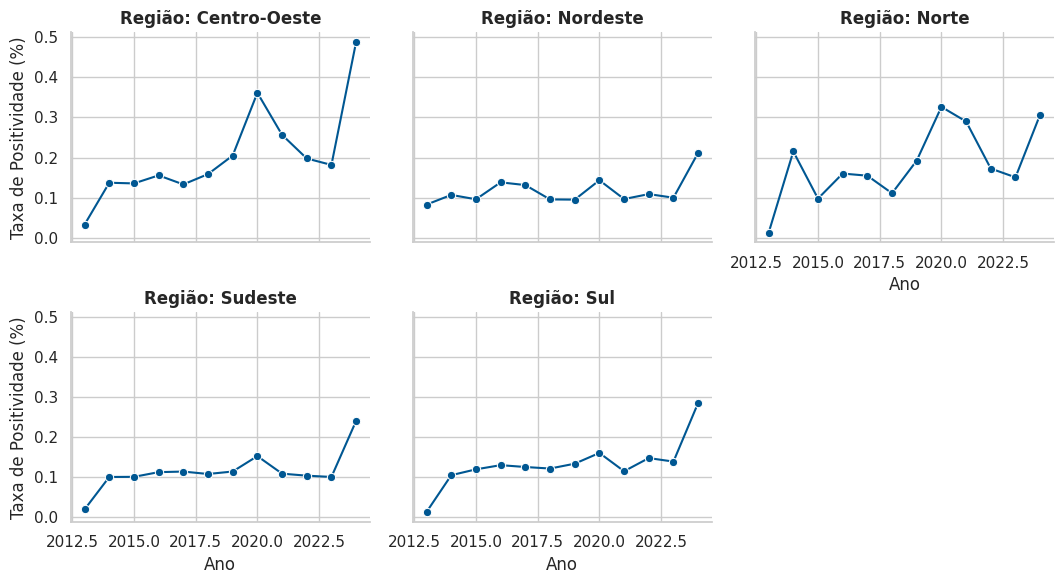

In [ ]:
# 1. Pré-processamento e Agregação por Região (Simulação, pois 'regiao' não está no df_master)
# Assumindo que você criou a coluna 'regiao' no df_master

# Classificação simplificada para Regiões (APENAS EXEMPLO DE SIMULAÇÃO)
def classificar_regiao(uf):
    norte = ['Acre', 'Amazonas', 'Roraima', 'Rondônia', 'Pará', 'Amapá', 'Tocantins']
    nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia']
    sudeste = ['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo']
    sul = ['Paraná', 'Santa Catarina', 'Rio Grande do Sul']
    centro_oeste = ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
    if uf in norte: return 'Norte'
    elif uf in nordeste: return 'Nordeste'
    elif uf in sudeste: return 'Sudeste'
    elif uf in sul: return 'Sul'
    elif uf in centro_oeste: return 'Centro-Oeste'
    return 'Outros'

# Aplicar a classificação no DataFrame (simulação)
df_master['regiao'] = df_master['uf_nome'].apply(classificar_regiao)

# Calcular Positividade Média por Região/Ano
df_regiao_ano = df_master[df_master['regiao'] != 'Outros'].groupby(['ano', 'regiao'])['taxa_positividade'].mean().reset_index()

# Lição 5: Pensar como designer - Utilizar Small Multiples
# (Requer Seaborn ou Matplotlib/FacetGrid, FacetGrid é uma forma mais limpa de fazer pequenos múltiplos)

g = sns.FacetGrid(df_regiao_ano, col="regiao", col_wrap=3, height=3, aspect=1.2)

# Plotar a linha em cada painel (L5/L3: Separação Espacial)
g.map(sns.lineplot, "ano", "taxa_positividade", marker="o", color='#005792')

# Lição 3/5: Melhorar estética e legibilidade de cada painel
g.set_titles("Região: {col_name}", size=12, fontweight='bold')
g.set_axis_labels("Ano", "Taxa de Positividade (%)")
g.set_xticks(df_regiao_ano['ano'].unique()[::2]) # Mostrar anos a cada 2
g.set(ylim=(0, df_regiao_ano['taxa_positividade'].max() * 1.1))

# Remover frames (L3)
for ax in g.axes.flat:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle("Evolução Regional da Taxa de Positividade (Diagnósticos/Exames)",
             y=1.02, fontsize=16, fontweight='bold') # Título de Ação/Storytelling (L6)
plt.tight_layout()
plt.show()

